https://github.com/cgohlke/talib-build/releases

ta_lib-0.6.4-cp310-cp310-win32.whl
sha256:2f2850a4b8642b0c7b10cbdbd1abd8cf13fa85dc2244a54718c533cf9ad4d11d
776 KB
Jun 16
ta_lib-0.6.4-cp310-cp310-win_amd64.whl
sha256:e3d127a3dd4066f4db76eb2cf642feadbc8c55ede19c84185004837ba4410227
898 KB
Jun 16
ta_lib-0.6.4-cp311-cp311-win32.whl
sha256:66ca526f9c3846db09e83bf90ac3ea60c5ea00d3a8d97ccd3b68844fefd7a22f
778 KB
Jun 16
ta_lib-0.6.4-cp311-cp311-win_amd64.whl
sha256:c1af5af76638dd4db2121529b2b022e62992b14ce8a5acac9277f099adc97022
900 KB
Jun 16
ta_lib-0.6.4-cp311-cp311-win_arm64.whl
sha256:359a40ec429a7e797b85d987525b5a6d019c111f39706f7239da1fec174a349d
744 KB
Jun 16
ta_lib-0.6.4-cp312-cp312-win32.whl
sha256:d3680a2ea358101bb9bf5a5007172a2d76d69a10e3adb1a7a3035bed278211bd
774 KB
Jun 16
ta_lib-0.6.4-cp312-cp312-win_amd64.whl
sha256:34340f2f94513ceecfa90b2aeb09f0b1c4c2f01a31d3b06cbdf2e08aca2c421e
900 KB
Jun 16
ta_lib-0.6.4-cp312-cp312-win_arm64.whl
sha256:a41502488786559324994b22d35398883f231cc83a5b99e6cde9f85e8f8d3ff7
739 KB
Jun 16
ta_lib-0.6.4-cp313-cp313-win32.whl
sha256:294ee6d62fc923efb4f0102560f358db26109dae71962ce72099bc8a7ecb8024
775 KB
Jun 16
ta_lib-0.6.4-cp313-cp313-win_amd64.whl
sha256:1a603084df659515d6f6107f0844678284cb2d3813eafacd4c378b0d7a6c8ffa
899 KB
Jun 16

# 新增區段

In [ ]:
!pip install tablib

## 可能需要先安裝 pandas_datareader:
!pip install pandas-datareader

In [65]:
## 1 ok

import yfinance as yf
import datetime

def get_stock_data(stock_symbols, start_date):
    # 處理多個股票代號
    symbols_list = [s.strip().upper() for s in stock_symbols.split(',')]
    processed_symbols = []
    valid_symbols = []

    for symbol in symbols_list:
        # 檢查股票代號是否已有後綴
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            # 先嘗試上市股票
            processed_symbols.append(symbol + '.TW')
        else:
            processed_symbols.append(symbol)

    try:
        df = yf.download(processed_symbols, start=start_date, group_by='ticker')

        # 檢查哪些股票成功取得資料
        for symbol in processed_symbols:
            if symbol in df.columns.get_level_values(0):
                valid_symbols.append(symbol)

        if not valid_symbols:
            print("所有股票代號均無法取得資料，請確認代號是否正確")
            return None

        print(f"成功取得 {', '.join(valid_symbols)} 的股票資料")

        # 找出失敗的代號
        failed_symbols = [s for s in processed_symbols if s not in valid_symbols]
        if failed_symbols:
            print(f"以下代號無法取得資料: {', '.join(failed_symbols)} (可能已下市或代號錯誤)")

        return df
    except Exception as e:
        print(f"取得股票資料時發生錯誤: {e}")
        return None

def get_valid_date(prompt, default_date):
    while True:
        date_input = input(prompt).strip()
        if not date_input:
            return default_date
        try:
            return datetime.datetime.strptime(date_input, "%Y-%m-%d")
        except ValueError:
            print("日期格式不正確，請使用 YYYY-MM-DD 格式")

# 主程式
print("台灣股票資料查詢")
print("請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)")

# 設定預設日期範圍
today = datetime.datetime.now()
default_start = today - datetime.timedelta(days=365*5)  # 預設5年前

# 讓使用者選擇日期範圍
start_date = get_valid_date(
    f"請輸入開始日期 (YYYY-MM-DD，預設 {default_start.date()}): ",
    default_start
)

while True:
    user_input = input("\n請輸入股票代號 (或輸入 'quit' 結束): ").strip()

    if user_input.lower() == 'quit':
        break

    if not user_input:
        print("請輸入有效的股票代號")
        continue

    # 取得股票資料
    stock_data = get_stock_data(user_input, start_date)

    if stock_data is not None:
        print("\n前5筆資料:")
        print(stock_data.head())
        print("\n最近5筆資料:")
        print(stock_data.tail())

print("程式結束")

台灣股票資料查詢
請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)
請輸入開始日期 (YYYY-MM-DD，預設 2020-08-03): 

請輸入股票代號 (或輸入 'quit' 結束): 2330,2454,6116


[*********************100%***********************]  3 of 3 completed


成功取得 2330.TW, 2454.TW, 6116.TW 的股票資料

前5筆資料:
Ticker         2330.TW                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-08-03  381.971227  385.150536  376.975171  377.883545  76429571   
2020-08-04  382.879596  386.513092  380.154475  386.513092  41223445   
2020-08-05  391.054974  393.780096  386.967292  389.692413  47223834   
2020-08-06  397.413543  397.867730  391.509113  395.142609  41029627   
2020-08-07  393.780145  394.234332  388.784088  393.325958  36589460   

Ticker         2454.TW                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-08-03  537.205460  537.205460  502.500397  503.223419  25733096   
2020-08-04  508.284497  529.252136  506.115431  529.252136  19226303   
2020-08-05  531.42

KeyboardInterrupt: Interrupted by user

台灣股票資料查詢與K線圖繪製
請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)
請輸入開始日期 (YYYY-MM-DD，預設 2020-08-03): 3008,2454,2330,6116
日期格式不正確，請使用 YYYY-MM-DD 格式
請輸入開始日期 (YYYY-MM-DD，預設 2020-08-03): 

請輸入股票代號 (或輸入 'quit' 結束): 2330,3008,2454,2338,6116


[*********************100%***********************]  5 of 5 completed
/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


成功取得 2330.TW, 3008.TW, 2454.TW, 2338.TW, 6116.TW 的股票資料

前5筆資料:
Ticker       6116.TW                                              2330.TW  \
Price           Open      High       Low     Close     Volume        Open   
Date                                                                        
2020-08-03  6.279659  6.333485  6.207892  6.261717   12112851  381.971227   
2020-08-04  6.817915  6.880712  6.629525  6.880712  130079946  382.879627   
2020-08-05  6.907625  7.257492  6.907625  7.185724  172749973  391.054913   
2020-08-06  7.248521  7.427940  7.122928  7.176754   96001455  397.413574   
2020-08-07  7.275433  7.284404  6.907625  6.925567   61014684  393.780115   

Ticker                                                    ...     2454.TW  \
Price             High         Low       Close    Volume  ...        Open   
Date                                                      ...               
2020-08-03  385.150536  376.975171  377.883545  76429571  ...  537.205330   
2020-08-04  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


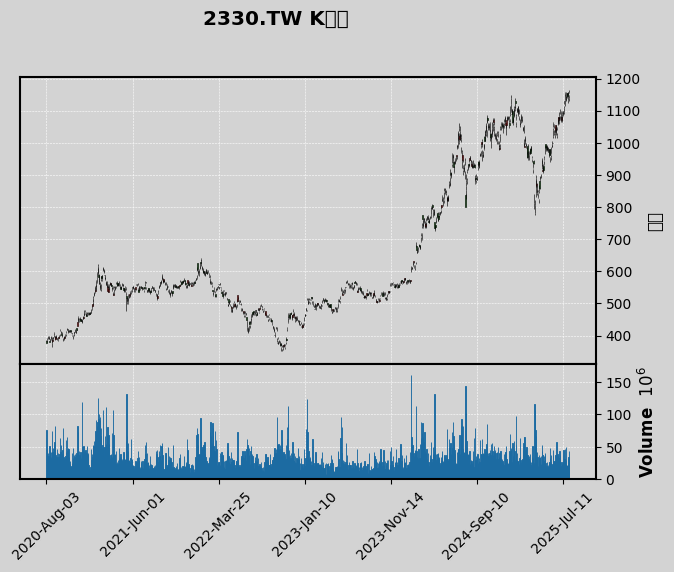

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/

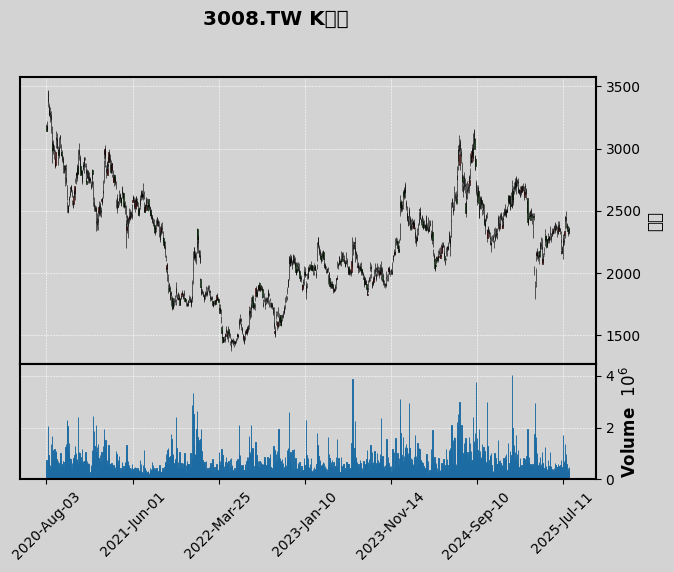

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/

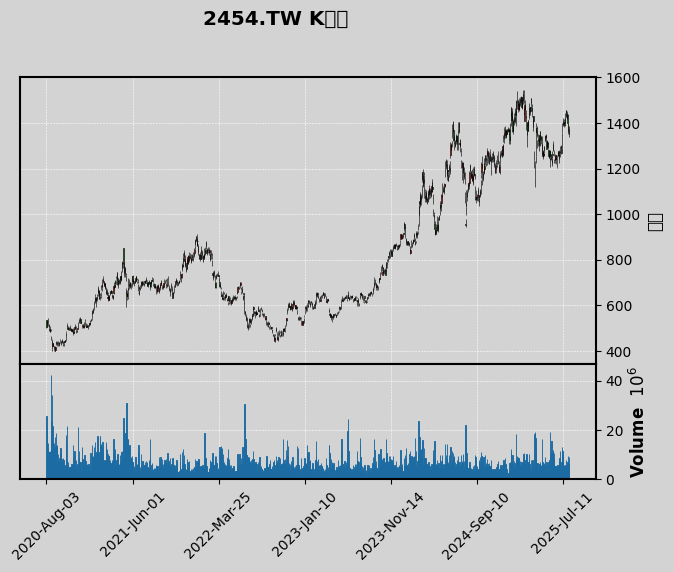

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/

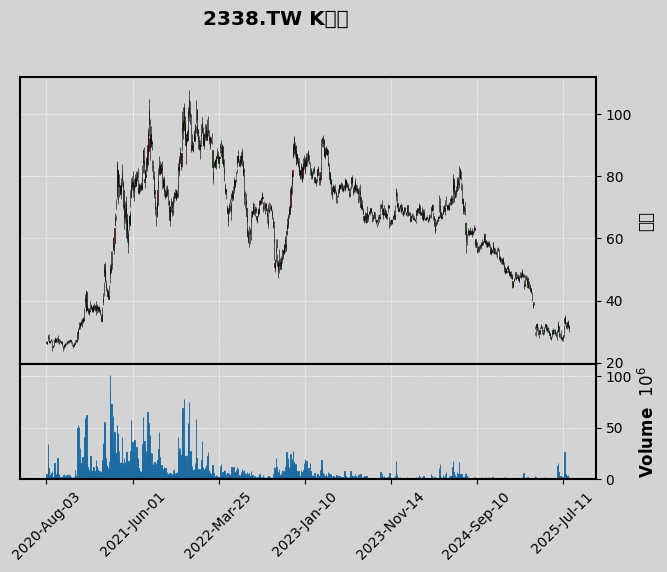

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/

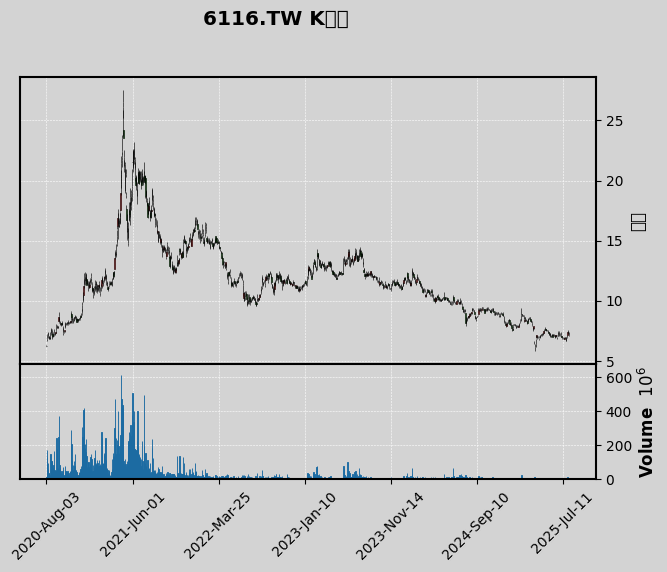

KeyboardInterrupt: Interrupted by user

In [66]:
## 2 ok
import yfinance as yf
import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt

def get_stock_data(stock_symbols, start_date):
    # 處理多個股票代號
    symbols_list = [s.strip().upper() for s in stock_symbols.split(',')]
    processed_symbols = []
    valid_symbols = []

    for symbol in symbols_list:
        # 檢查股票代號是否已有後綴
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            # 先嘗試上市股票
            processed_symbols.append(symbol + '.TW')
        else:
            processed_symbols.append(symbol)

    try:
        df = yf.download(processed_symbols, start=start_date, group_by='ticker')

        # 檢查哪些股票成功取得資料
        for symbol in processed_symbols:
            if symbol in df.columns.get_level_values(0):
                valid_symbols.append(symbol)

        if not valid_symbols:
            print("所有股票代號均無法取得資料，請確認代號是否正確")
            return None

        print(f"成功取得 {', '.join(valid_symbols)} 的股票資料")

        # 找出失敗的代號
        failed_symbols = [s for s in processed_symbols if s not in valid_symbols]
        if failed_symbols:
            print(f"以下代號無法取得資料: {', '.join(failed_symbols)} (可能已下市或代號錯誤)")

        return df
    except Exception as e:
        print(f"取得股票資料時發生錯誤: {e}")
        return None

def get_valid_date(prompt, default_date):
    while True:
        date_input = input(prompt).strip()
        if not date_input:
            return default_date
        try:
            return datetime.datetime.strptime(date_input, "%Y-%m-%d")
        except ValueError:
            print("日期格式不正確，請使用 YYYY-MM-DD 格式")

def plot_kline(stock_data, symbol):
    try:
        # 準備K線圖資料
        data = stock_data[symbol].copy()
        data.index = data.index.tz_localize(None)  # 移除時區資訊

        # 設定淺灰底色風格
        style = mpf.make_mpf_style(base_mpf_style='charles',
                                 facecolor='lightgray',
                                 gridcolor='white',
                                 gridstyle="--",
                                 edgecolor='black',
                                 figcolor='lightgray',
                                 marketcolors=mpf.make_marketcolors(up='r', down='g'))

        # 繪製K線圖
        fig, axlist = mpf.plot(data, type='candle', style=style,
                              title=f'{symbol} K線圖',
                              ylabel='價格',
                              volume=True,
                              returnfig=True)

        # 調整圖表背景色
        fig.patch.set_facecolor('lightgray')
        for ax in axlist:
            ax.set_facecolor('lightgray')

        plt.show()
    except Exception as e:
        print(f"繪製K線圖時發生錯誤: {e}")

# 主程式
print("台灣股票資料查詢與K線圖繪製")
print("請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)")

# 設定預設日期範圍
today = datetime.datetime.now()
default_start = today - datetime.timedelta(days=365*5)  # 預設5年前

# 讓使用者選擇日期範圍
start_date = get_valid_date(
    f"請輸入開始日期 (YYYY-MM-DD，預設 {default_start.date()}): ",
    default_start
)

while True:
    user_input = input("\n請輸入股票代號 (或輸入 'quit' 結束): ").strip()

    if user_input.lower() == 'quit':
        break

    if not user_input:
        print("請輸入有效的股票代號")
        continue

    # 取得股票資料
    stock_data = get_stock_data(user_input, start_date)

    if stock_data is not None:
        print("\n前5筆資料:")
        print(stock_data.head())
        print("\n最近5筆資料:")
        print(stock_data.tail())

        # 繪製每檔股票的K線圖
        symbols = [s.strip().upper() for s in user_input.split(',')]
        for symbol in symbols:
            # 處理股票代號後綴
            if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
                symbol += '.TW'

            if symbol in stock_data.columns.get_level_values(0):
                plot_kline(stock_data, symbol)

print("程式結束")

台灣股票資料查詢與K線圖繪製
請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)
請輸入開始日期 (YYYY-MM-DD，預設 2020-08-03): 

請輸入股票代號 (或輸入 'quit' 結束): 2333,2330,6116.2543


[*********************100%***********************]  3 of 3 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['2333.TW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-03 21:50:36.782938 -> 2025-08-02)')
ERROR:yfinance:['6116.2543.TW']: YFTzMissingError('possibly delisted; no timezone found')


成功取得 2333.TW, 2330.TW, 6116.2543.TW 的股票資料

前5筆資料:
Ticker     2333.TW                                 6116.2543.TW           \
Price         Open High Low Close Adj Close Volume         Open High Low   
Date                                                                       
2020-08-03     NaN  NaN NaN   NaN       NaN    NaN          NaN  NaN NaN   
2020-08-04     NaN  NaN NaN   NaN       NaN    NaN          NaN  NaN NaN   
2020-08-05     NaN  NaN NaN   NaN       NaN    NaN          NaN  NaN NaN   
2020-08-06     NaN  NaN NaN   NaN       NaN    NaN          NaN  NaN NaN   
2020-08-07     NaN  NaN NaN   NaN       NaN    NaN          NaN  NaN NaN   

Ticker                                2330.TW                          \
Price      Close Adj Close Volume        Open        High         Low   
Date                                                                    
2020-08-03   NaN       NaN    NaN  381.971197  385.150505  376.975141   
2020-08-04   NaN       NaN    NaN  382.879536  38

KeyboardInterrupt: Interrupted by user

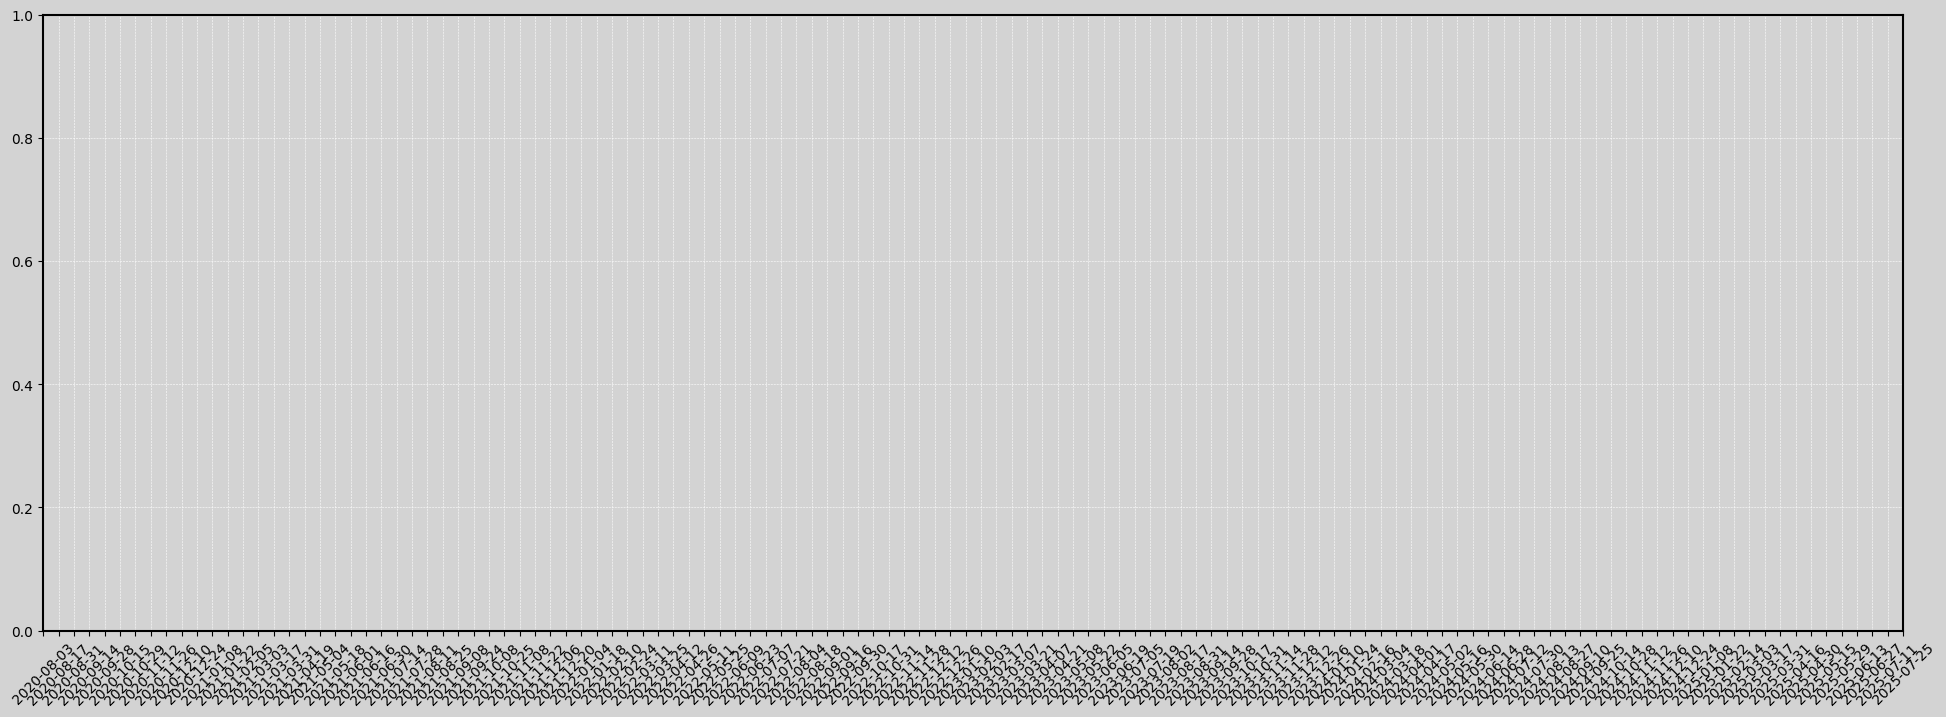

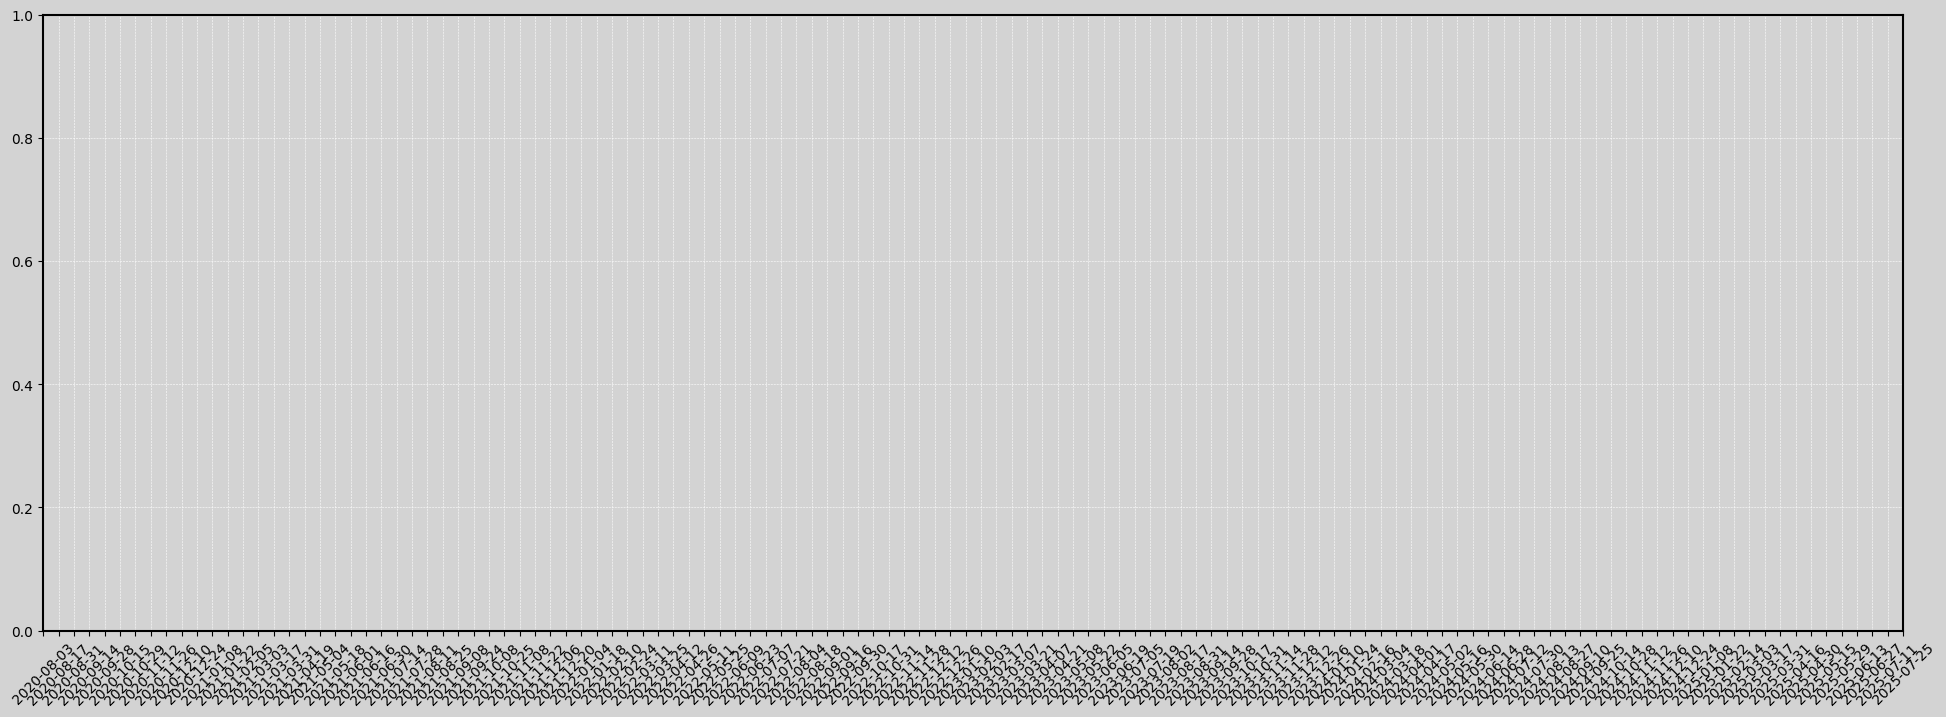

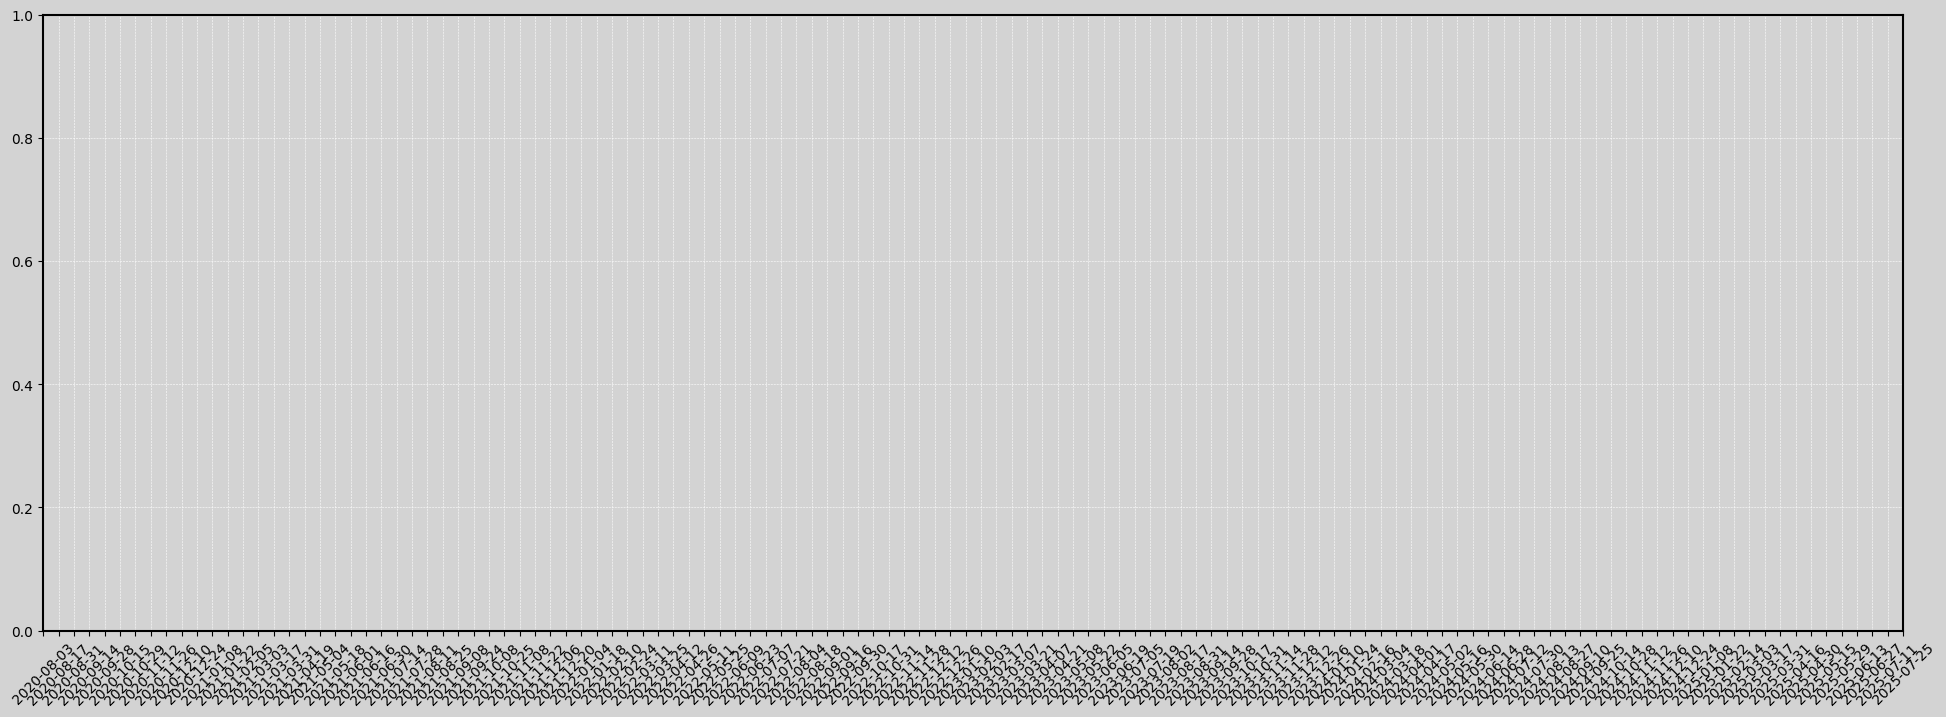

In [67]:
## 3.1 XX
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import mplfinance as mpf

def get_stock_data(stock_symbols, start_date):
    # 處理多個股票代號
    symbols_list = [s.strip().upper() for s in stock_symbols.split(',')]
    processed_symbols = []
    valid_symbols = []

    for symbol in symbols_list:
        # 檢查股票代號是否已有後綴
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            # 先嘗試上市股票
            processed_symbols.append(symbol + '.TW')
        else:
            processed_symbols.append(symbol)

    try:
        df = yf.download(processed_symbols, start=start_date, group_by='ticker')

        # 檢查哪些股票成功取得資料
        for symbol in processed_symbols:
            if symbol in df.columns.get_level_values(0):
                valid_symbols.append(symbol)

        if not valid_symbols:
            print("所有股票代號均無法取得資料，請確認代號是否正確")
            return None

        print(f"成功取得 {', '.join(valid_symbols)} 的股票資料")

        # 找出失敗的代號
        failed_symbols = [s for s in processed_symbols if s not in valid_symbols]
        if failed_symbols:
            print(f"以下代號無法取得資料: {', '.join(failed_symbols)} (可能已下市或代號錯誤)")

        return df
    except Exception as e:
        print(f"取得股票資料時發生錯誤: {e}")
        return None

def get_valid_date(prompt, default_date):
    while True:
        date_input = input(prompt).strip()
        if not date_input:
            return default_date
        try:
            return datetime.datetime.strptime(date_input, "%Y-%m-%d")
        except ValueError:
            print("日期格式不正確，請使用 YYYY-MM-DD 格式")

def plot_kline(stock_data, symbol):
    try:
        # 準備K線圖資料
        df = stock_data[symbol].copy()
        df.index = df.index.strftime('%Y-%m-%d')  # 格式化日期

        # 創建圖表
        fig = plt.figure(figsize=(24, 8), facecolor='lightgray')
        ax = fig.add_subplot(1, 1, 1, facecolor='lightgray')

        # 設置每10天顯示一個日期標籤
        ax.set_xticks(range(0, len(df.index), 10))
        ax.set_xticklabels(df.index[::10], rotation=45)

        # 繪製K線圖
        mpf.candlestick2_ochl(ax,
                             opens=df['Open'],
                             closes=df['Close'],
                             highs=df['High'],
                             lows=df['Low'],
                             width=0.6,
                             colorup='r',
                             colordown='g',
                             alpha=0.75)

        # 設置圖表標題和標籤
        ax.set_title(f'{symbol} K線圖', fontsize=16)
        ax.set_ylabel('價格', fontsize=12)

        # 設置網格線
        ax.grid(True, linestyle='--', linewidth=0.5, color='white')

        # 調整布局防止標籤被截斷
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"繪製K線圖時發生錯誤: {e}")

# 主程式
print("台灣股票資料查詢與K線圖繪製")
print("請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)")

# 設定預設日期範圍
today = datetime.datetime.now()
default_start = today - datetime.timedelta(days=365*5)  # 預設5年前

# 讓使用者選擇日期範圍
start_date = get_valid_date(
    f"請輸入開始日期 (YYYY-MM-DD，預設 {default_start.date()}): ",
    default_start
)

while True:
    user_input = input("\n請輸入股票代號 (或輸入 'quit' 結束): ").strip()

    if user_input.lower() == 'quit':
        break

    if not user_input:
        print("請輸入有效的股票代號")
        continue

    # 取得股票資料
    stock_data = get_stock_data(user_input, start_date)

    if stock_data is not None:
        print("\n前5筆資料:")
        print(stock_data.head())
        print("\n最近5筆資料:")
        print(stock_data.tail())

        # 繪製每檔股票的K線圖
        symbols = [s.strip().upper() for s in user_input.split(',')]
        for symbol in symbols:
            # 處理股票代號後綴
            if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
                symbol += '.TW'

            if symbol in stock_data.columns.get_level_values(0):
                plot_kline(stock_data, symbol)

print("程式結束")

台灣股票資料查詢與K線圖繪製
請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)
請輸入開始日期 (YYYY-MM-DD，預設 2020-08-03): 

請輸入股票代號 (或輸入 'quit' 結束): 2330,2333,6116,3008


[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['2333.TW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-08-03 21:53:48.724760 -> 2025-08-02)')
/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


成功取得 2330.TW, 2333.TW, 6116.TW, 3008.TW 的股票資料

前5筆資料:
Ticker     2333.TW                                     2330.TW              \
Price         Open High Low Close Adj Close Volume        Open        High   
Date                                                                         
2020-08-03     NaN  NaN NaN   NaN       NaN    NaN  381.971166  385.150474   
2020-08-04     NaN  NaN NaN   NaN       NaN    NaN  382.879596  386.513092   
2020-08-05     NaN  NaN NaN   NaN       NaN    NaN  391.055035  393.780158   
2020-08-06     NaN  NaN NaN   NaN       NaN    NaN  397.413543  397.867730   
2020-08-07     NaN  NaN NaN   NaN       NaN    NaN  393.780054  394.234241   

Ticker                              ...   6116.TW                      \
Price              Low       Close  ...      Open      High       Low   
Date                                ...                                 
2020-08-03  376.975110  377.883484  ...  6.279659  6.333485  6.207892   
2020-08-04  380.154475  386.5

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


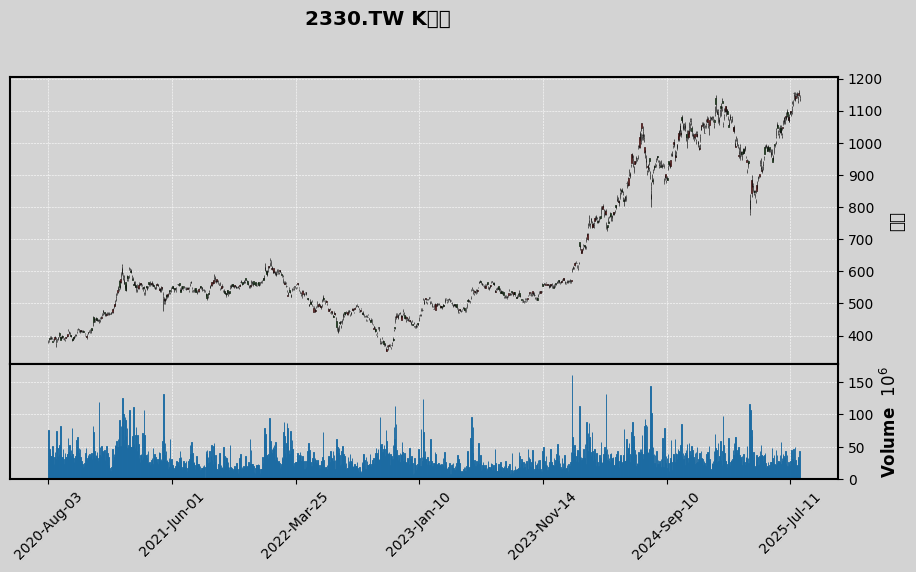

2333.TW 無有效資料可繪製


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/

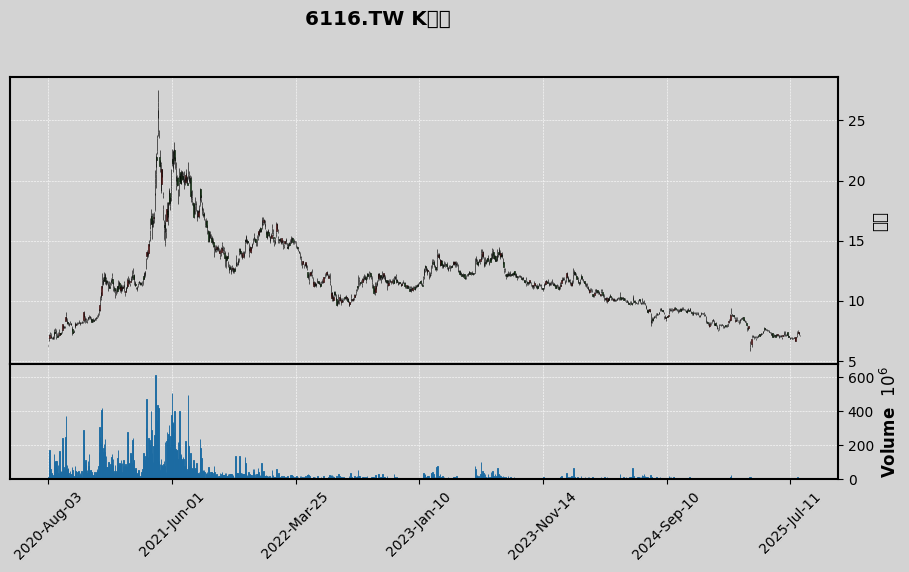

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/

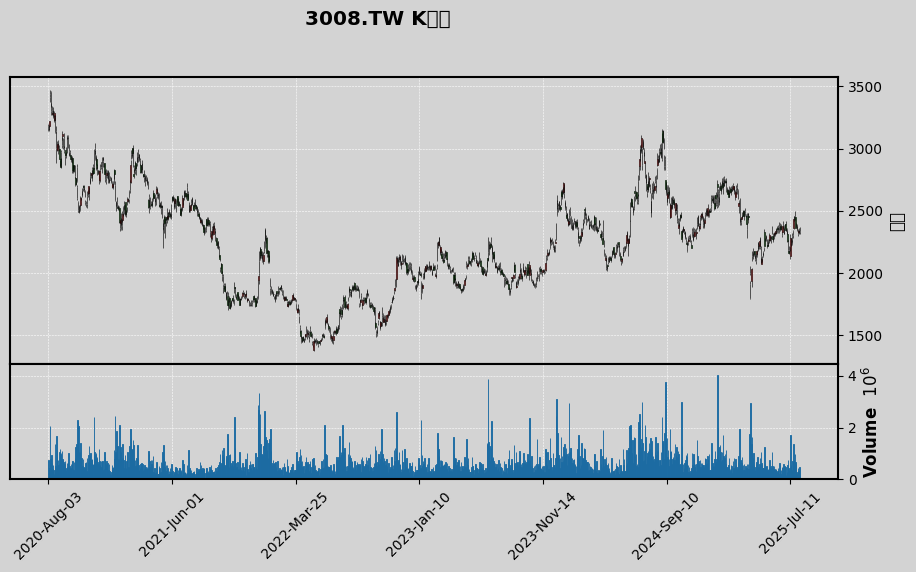

KeyboardInterrupt: Interrupted by user

In [68]:
## 3.2 XX
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

def get_stock_data(stock_symbols, start_date):
    # 處理多個股票代號
    symbols_list = [s.strip().upper() for s in stock_symbols.split(',')]
    processed_symbols = []
    valid_symbols = []

    for symbol in symbols_list:
        # 檢查股票代號是否已有後綴
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            # 先嘗試上市股票
            processed_symbols.append(symbol + '.TW')
        else:
            processed_symbols.append(symbol)

    try:
        df = yf.download(processed_symbols, start=start_date, group_by='ticker')

        # 檢查哪些股票成功取得資料
        valid_symbols = [s for s in processed_symbols if s in df.columns.get_level_values(0)]

        if not valid_symbols:
            print("所有股票代號均無法取得資料，請確認代號是否正確")
            return None

        print(f"成功取得 {', '.join(valid_symbols)} 的股票資料")

        # 找出失敗的代號
        failed_symbols = [s for s in processed_symbols if s not in valid_symbols]
        if failed_symbols:
            print(f"以下代號無法取得資料: {', '.join(failed_symbols)} (可能已下市或代號錯誤)")

        return df
    except Exception as e:
        print(f"取得股票資料時發生錯誤: {e}")
        return None

def get_valid_date(prompt, default_date):
    while True:
        date_input = input(prompt).strip()
        if not date_input:
            return default_date
        try:
            return datetime.datetime.strptime(date_input, "%Y-%m-%d")
        except ValueError:
            print("日期格式不正確，請使用 YYYY-MM-DD 格式")

def plot_kline(stock_data, symbol):
    try:
        # 準備K線圖資料
        df = stock_data[symbol].copy()

        # 檢查是否有有效資料
        if df.isnull().all().all():
            print(f"{symbol} 無有效資料可繪製")
            return

        # 重新命名欄位以符合mplfinance要求
        df = df.rename(columns={
            'Open': 'open',
            'High': 'high',
            'Low': 'low',
            'Close': 'close',
            'Volume': 'volume'
        })

        # 設定淺灰底色風格
        style = mpf.make_mpf_style(base_mpf_style='charles',
                                 facecolor='lightgray',
                                 gridcolor='white',
                                 gridstyle="--",
                                 edgecolor='black',
                                 figcolor='lightgray',
                                 marketcolors=mpf.make_marketcolors(up='r', down='g'))

        # 繪製K線圖
        mpf.plot(df,
                type='candle',
                style=style,
                title=f'{symbol} K線圖',
                ylabel='價格',
                volume=True,
                figratio=(12, 6),
                show_nontrading=False)

    except Exception as e:
        print(f"繪製 {symbol} K線圖時發生錯誤: {e}")

# 主程式
print("台灣股票資料查詢與K線圖繪製")
print("請輸入股票代號 (多個代號請用逗號分隔，例如: 2330,2454,2449.TWO)")

# 設定預設日期範圍
today = datetime.datetime.now()
default_start = today - datetime.timedelta(days=365*5)  # 預設5年前

# 讓使用者選擇日期範圍
start_date = get_valid_date(
    f"請輸入開始日期 (YYYY-MM-DD，預設 {default_start.date()}): ",
    default_start
)

while True:
    user_input = input("\n請輸入股票代號 (或輸入 'quit' 結束): ").strip()

    if user_input.lower() == 'quit':
        break

    if not user_input:
        print("請輸入有效的股票代號")
        continue

    # 取得股票資料
    stock_data = get_stock_data(user_input, start_date)

    if stock_data is not None:
        print("\n前5筆資料:")
        print(stock_data.head())
        print("\n最近5筆資料:")
        print(stock_data.tail())

        # 繪製每檔股票的K線圖
        symbols = [s.strip().upper() for s in user_input.split(',')]
        for symbol in symbols:
            # 處理股票代號後綴
            if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
                symbol += '.TW'

            if symbol in stock_data.columns.get_level_values(0):
                plot_kline(stock_data, symbol)

print("程式結束")

台灣股票技術分析圖 (暗色模式)
請輸入股票代號 (多個請用逗號分隔，如: 2330.TW,2454.TWO)
請輸入開始日期 (YYYY-MM-DD，預設 2024-08-02): 2330
日期格式不正確，請使用 YYYY-MM-DD 格式
請輸入開始日期 (YYYY-MM-DD，預設 2024-08-02): 2330,3008,6116
日期格式不正確，請使用 YYYY-MM-DD 格式
請輸入開始日期 (YYYY-MM-DD，預設 2024-08-02): 

請輸入股票代號 (或輸入 'quit' 結束): 2330,3008,6116


[*********************100%***********************]  3 of 3 completed


成功取得 2330.TW, 3008.TW, 6116.TW 的股票資料

前5筆資料:
Ticker     6116.TW                                 2330.TW              \
Price         Open  High   Low Close    Volume        Open        High   
Date                                                                     
2024-08-02    9.20  9.25  9.07  9.08   8023065  902.373759  912.203538   
2024-08-05    8.96  8.96  8.18  8.18  25483803  837.497134  842.412023   
2024-08-06    8.18  8.41  7.90  8.16  13573170  853.224834  879.765238   
2024-08-07    8.17  8.68  8.17  8.64  11327224  885.663140  904.339722   
2024-08-08    8.49  8.55  8.32  8.39   6359266  885.663120  889.595031   

Ticker                                             3008.TW               \
Price              Low       Close     Volume         Open         High   
Date                                                                      
2024-08-02  887.629089  887.629089   76144485  2688.064445  2716.968364   
2024-08-05  799.160997  801.126953  144057989  2562.814114  25

/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 34899 (\N{CJK UNIFIED IDEOGRAPH-8853}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 26263 (\N{CJK UNIFIED IDEOGRAPH-6697}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}

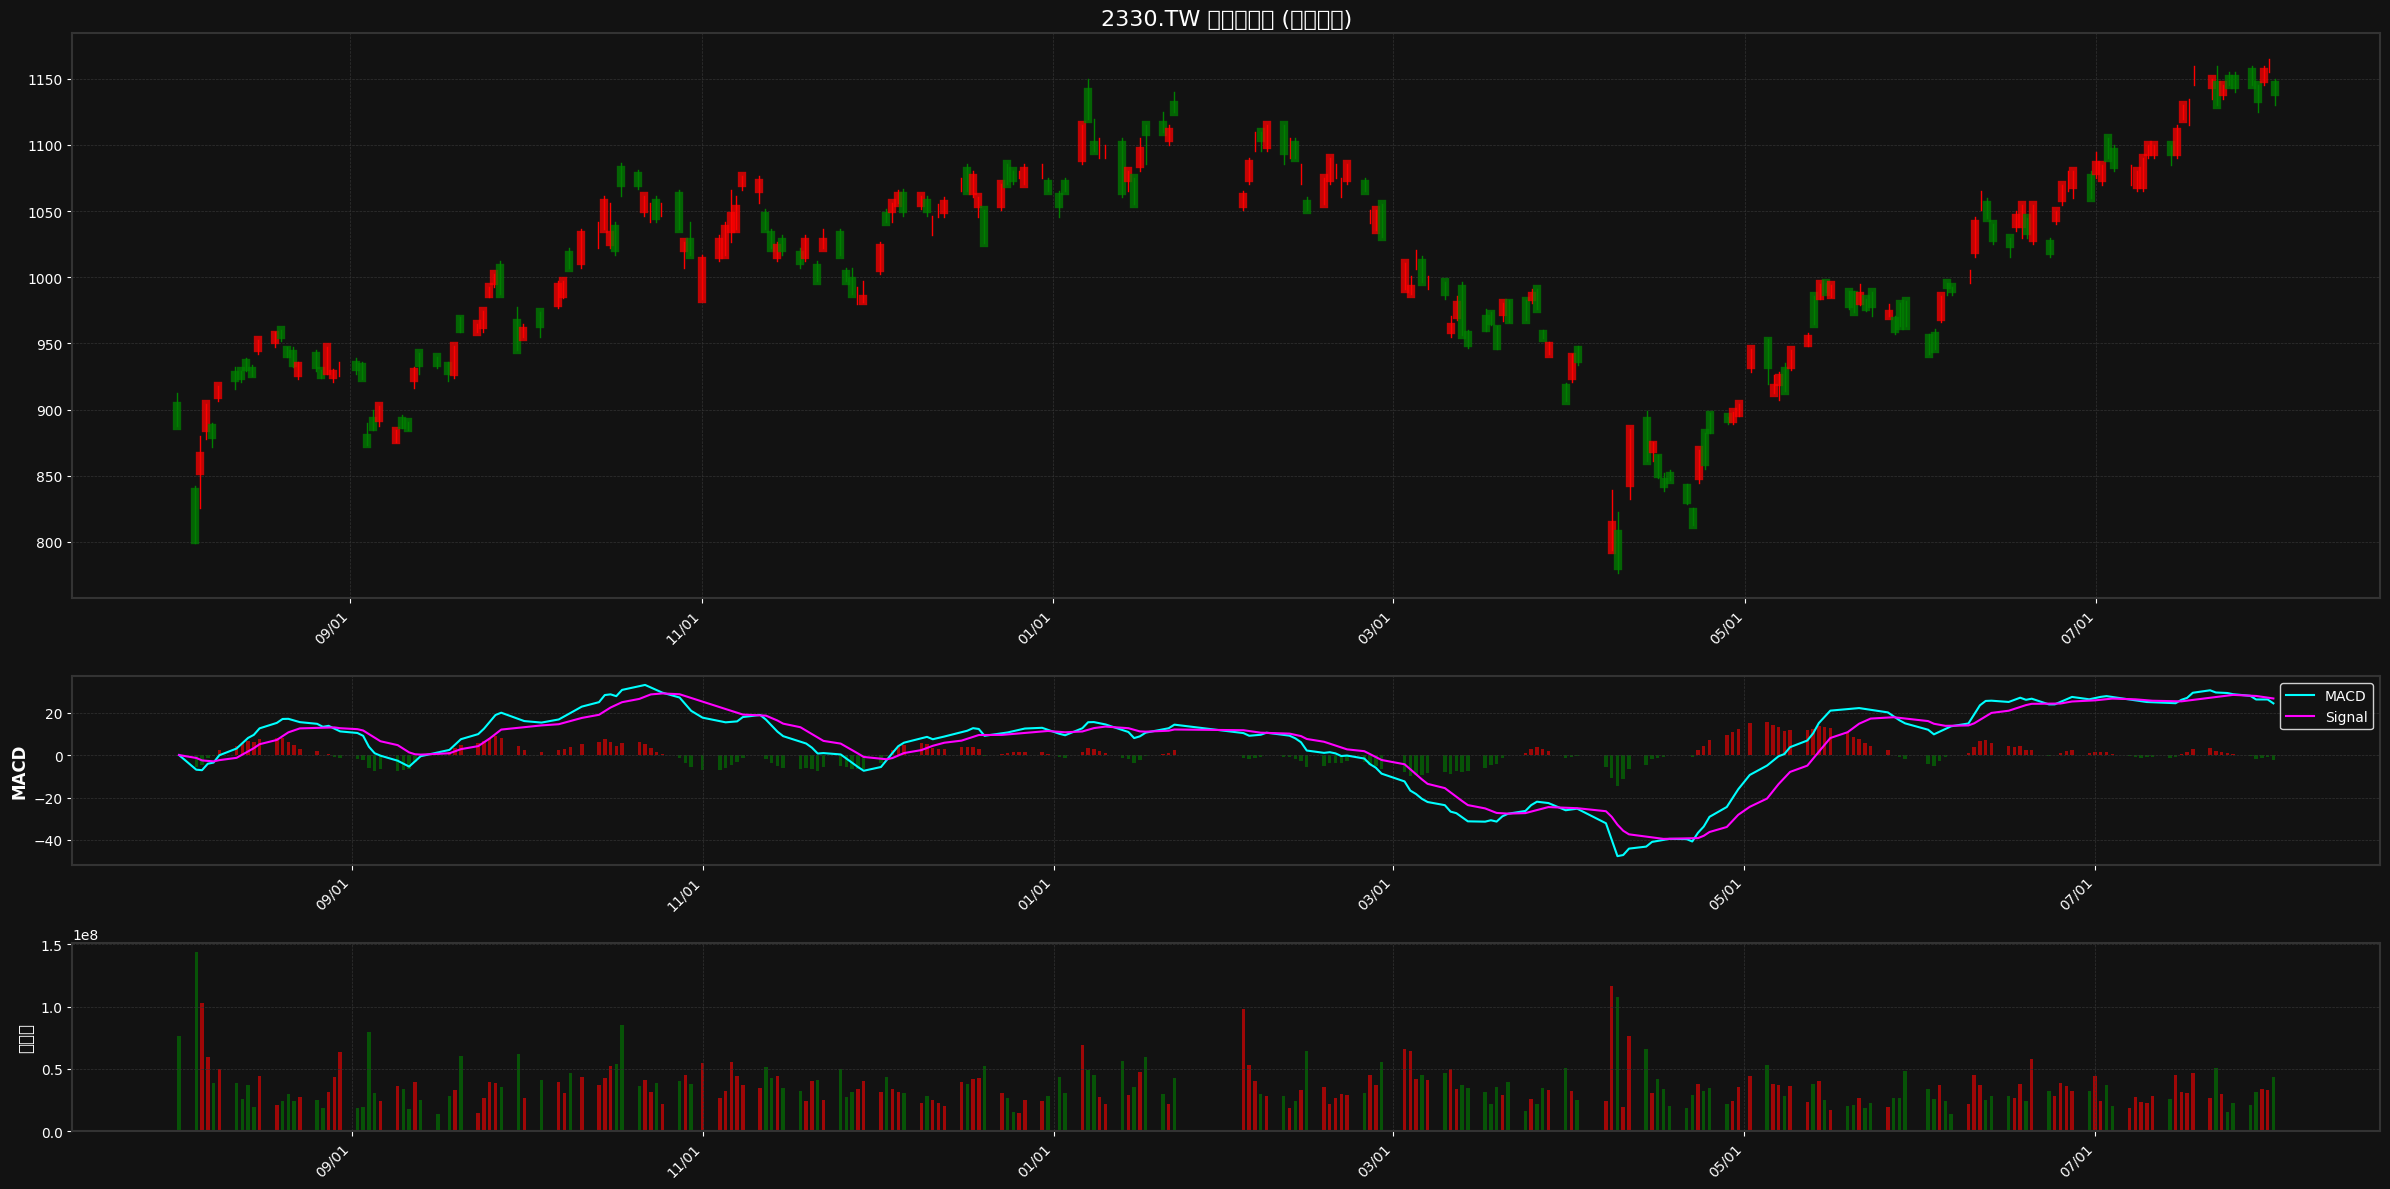

/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 34899 (\N{CJK UNIFIED IDEOGRAPH-8853}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 26263 (\N{CJK UNIFIED IDEOGRAPH-6697}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}

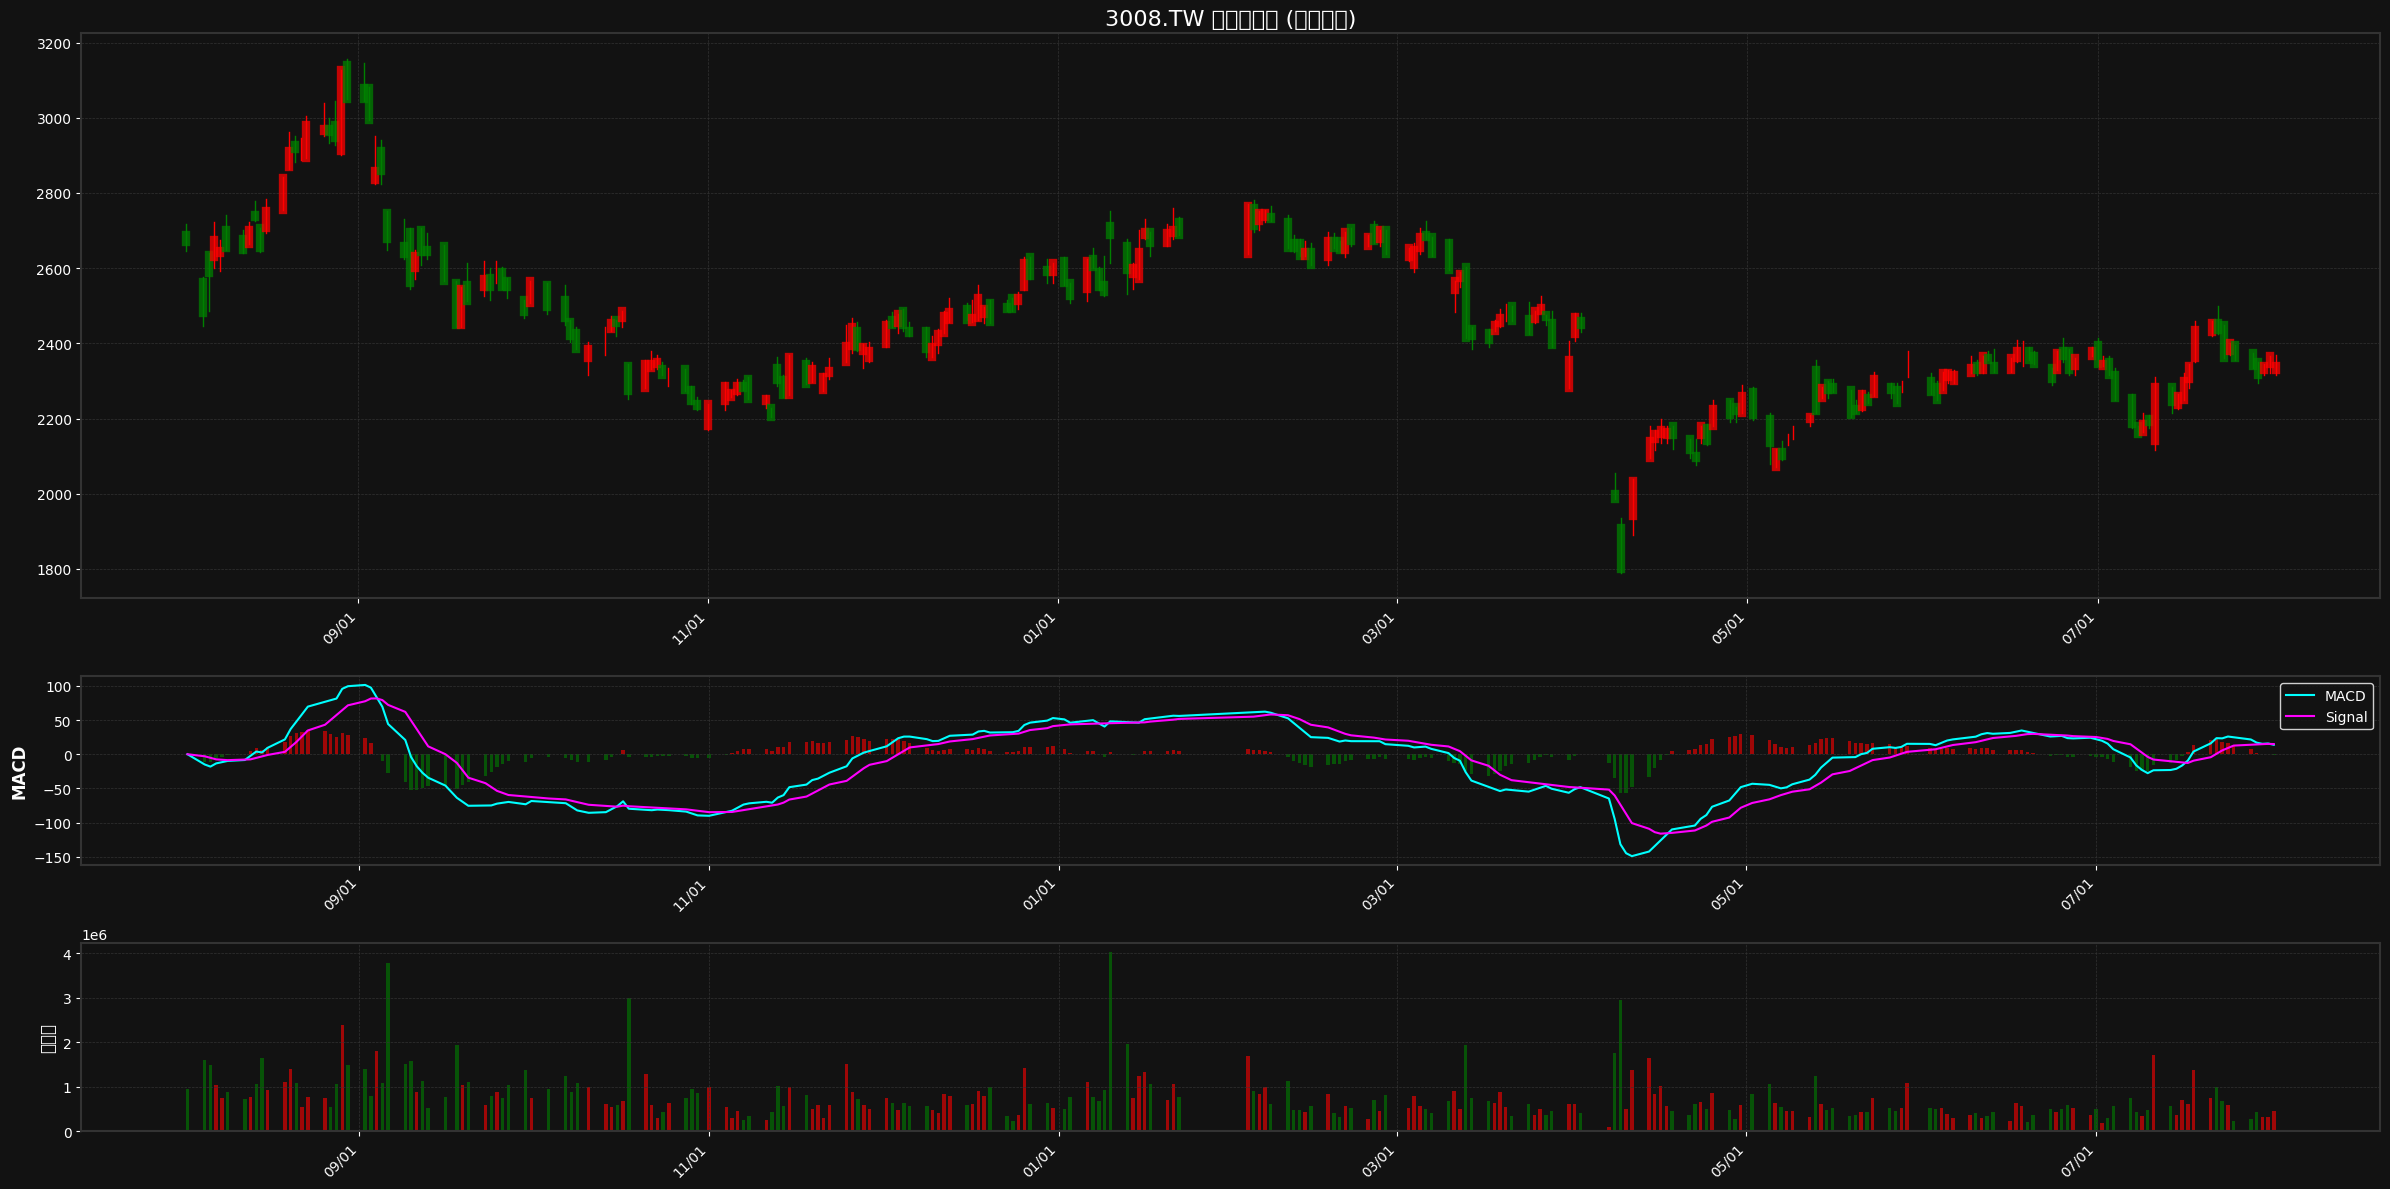

/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 25216 (\N{CJK UNIFIED IDEOGRAPH-6280}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 34899 (\N{CJK UNIFIED IDEOGRAPH-8853}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 26263 (\N{CJK UNIFIED IDEOGRAPH-6697}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3961172655.py:155: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}

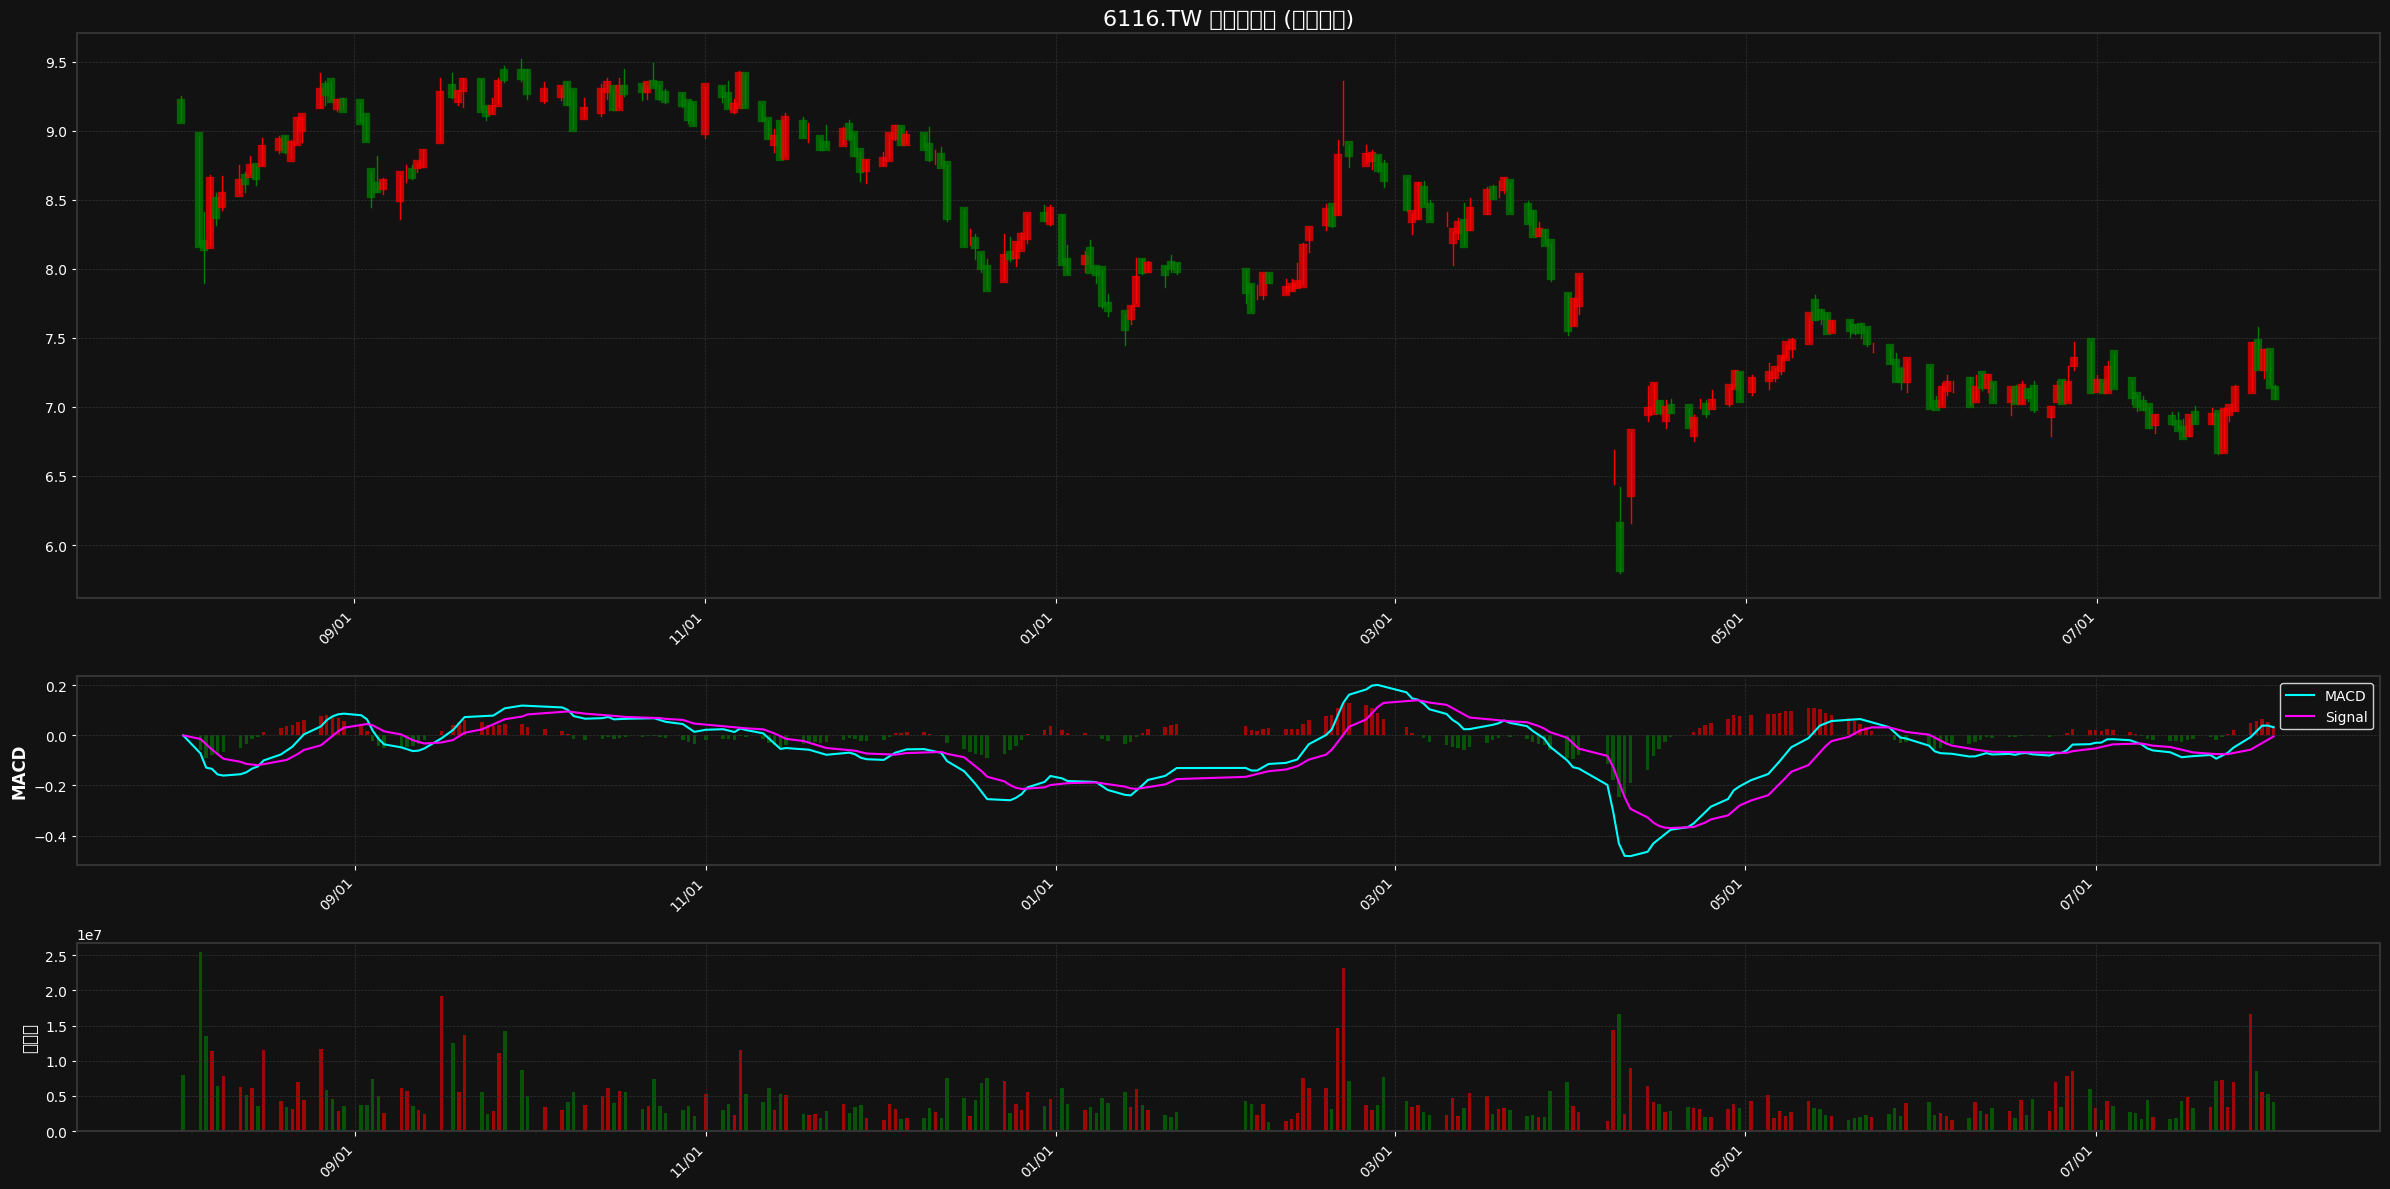


是否儲存圖表? (y/n, 10秒後自動取消): 
輸入超時，自動取消儲存
圖表未儲存


In [ ]:
## 3.3 OK

import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import threading
from matplotlib import gridspec
from queue import Queue

# 暗色模式配色
DARK_BG = '#121212'
GRID_COLOR = '#333333'
TEXT_COLOR = 'white'

def get_stock_data(stock_symbols, start_date):
    # 處理多個股票代號
    symbols_list = [s.strip().upper() for s in stock_symbols.split(',')]
    processed_symbols = []
    valid_symbols = []

    for symbol in symbols_list:
        # 檢查股票代號是否已有後綴
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            # 先嘗試上市股票
            processed_symbols.append(symbol + '.TW')
        else:
            processed_symbols.append(symbol)

    try:
        df = yf.download(processed_symbols, start=start_date, group_by='ticker')

        # 檢查哪些股票成功取得資料
        for symbol in processed_symbols:
            if symbol in df.columns.get_level_values(0):
                valid_symbols.append(symbol)

        if not valid_symbols:
            print("所有股票代號均無法取得資料，請確認代號是否正確")
            return None

        print(f"成功取得 {', '.join(valid_symbols)} 的股票資料")

        # 找出失敗的代號
        failed_symbols = [s for s in processed_symbols if s not in valid_symbols]
        if failed_symbols:
            print(f"以下代號無法取得資料: {', '.join(failed_symbols)} (可能已下市或代號錯誤)")

        return df
    except Exception as e:
        print(f"取得股票資料時發生錯誤: {e}")
        return None

def get_valid_date(prompt, default_date):
    while True:
        date_input = input(prompt).strip()
        if not date_input:
            return default_date
        try:
            return datetime.datetime.strptime(date_input, "%Y-%m-%d")
        except ValueError:
            print("日期格式不正確，請使用 YYYY-MM-DD 格式")

def calculate_macd(df, fast=12, slow=26, signal=9):
    """計算MACD指標"""
    df['EMA_Fast'] = df['Close'].ewm(span=fast, adjust=False).mean()
    df['EMA_Slow'] = df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD'] = df['EMA_Fast'] - df['EMA_Slow']
    df['Signal'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    df['Histogram'] = df['MACD'] - df['Signal']
    return df

def input_with_timeout(prompt, timeout=10):
    """帶超時的輸入函數"""
    print(prompt, end='', flush=True)
    q = Queue()

    def input_thread():
        q.put(input())

    thread = threading.Thread(target=input_thread)
    thread.daemon = True
    thread.start()

    try:
        return q.get(timeout=timeout)
    except:
        print("\n輸入超時，自動取消儲存")
        return 'n'

def plot_stock_with_macd(stock_data, symbol):
    try:
        # 準備K線圖資料
        df = stock_data[symbol].copy()
        df = calculate_macd(df)

        # 創建暗色背景圖表
        plt.style.use('dark_background')
        fig = plt.figure(figsize=(24, 12), facecolor=DARK_BG)
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1])  # K線:MACD:成交量

        # 1. K線圖區域
        ax1 = plt.subplot(gs[0])
        ax1.set_facecolor(DARK_BG)

        # 2. MACD指標區域
        ax2 = plt.subplot(gs[1])
        ax2.set_facecolor(DARK_BG)

        # 3. 成交量區域
        ax3 = plt.subplot(gs[2])
        ax3.set_facecolor(DARK_BG)

        # 日期轉換
        dates = mdates.date2num(df.index.to_pydatetime())

        # 繪製K線圖
        for i in range(len(df)):
            color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
            ax1.plot([dates[i], dates[i]], [df['Low'][i], df['High'][i]],
                    color=color, linewidth=1)
            ax1.plot([dates[i], dates[i]],
                    [min(df['Open'][i], df['Close'][i]), max(df['Open'][i], df['Close'][i])],
                    color=color, linewidth=6, alpha=0.75)

        # 繪製MACD指標
        ax2.plot(dates, df['MACD'], color='cyan', label='MACD', linewidth=1.5)
        ax2.plot(dates, df['Signal'], color='magenta', label='Signal', linewidth=1.5)
        for i in range(len(df)):
            color = 'r' if df['Histogram'][i] >= 0 else 'g'
            ax2.bar(dates[i], df['Histogram'][i], width=0.6, color=color, alpha=0.6)

        # 繪製成交量
        for i in range(len(df)):
            color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
            ax3.bar(dates[i], df['Volume'][i], width=0.6, color=color, alpha=0.6)

        # 設置圖表格式
        for ax in [ax1, ax2, ax3]:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax.grid(True, linestyle='--', linewidth=0.5, color=GRID_COLOR)
            ax.tick_params(colors=TEXT_COLOR)
            for spine in ax.spines.values():
                spine.set_color(GRID_COLOR)
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        ax1.set_title(f'{symbol} 技術分析圖 (暗色模式)', fontsize=16, color=TEXT_COLOR)
        ax2.set_ylabel('MACD', fontsize=12, color=TEXT_COLOR)
        ax2.legend(facecolor=DARK_BG, edgecolor=TEXT_COLOR)
        ax3.set_ylabel('成交量', fontsize=12, color=TEXT_COLOR)

        plt.tight_layout()
        plt.show()

        return fig

    except Exception as e:
        print(f"繪製K線圖時發生錯誤: {e}")
        return None

def save_figures_to_png(figures, symbols):
    """儲存圖表為PNG檔案"""
    if not os.path.exists('stock_charts'):
        os.makedirs('stock_charts')

    saved_files = []
    for fig, symbol in zip(figures, symbols):
        if fig:
            filename = f"stock_charts/{symbol}_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
            fig.savefig(filename, dpi=300, bbox_inches='tight', facecolor=DARK_BG)
            saved_files.append(filename)
            plt.close(fig)

    if saved_files:
        print("\n圖表已儲存:")
        for file in saved_files:
            print(f"- {file}")

# 主程式
print("台灣股票技術分析圖 (暗色模式)")
print("請輸入股票代號 (多個請用逗號分隔，如: 2330.TW,2454.TWO)")

today = datetime.datetime.now()
default_start = today - datetime.timedelta(days=365*1)

start_date = get_valid_date(
    f"請輸入開始日期 (YYYY-MM-DD，預設 {default_start.date()}): ",
    default_start
)

while True:
    user_input = input("\n請輸入股票代號 (或輸入 'quit' 結束): ").strip()

    if user_input.lower() == 'quit':
        break

    if not user_input:
        print("請輸入有效的股票代號")
        continue

    stock_data = get_stock_data(user_input, start_date)
    if stock_data is None:
        continue

    print("\n前5筆資料:")
    print(stock_data.head())
    print("\n最近5筆資料:")
    print(stock_data.tail())

    symbols = [s.strip().upper() for s in user_input.split(',')]
    processed_symbols = []
    figures = []

    for symbol in symbols:
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            symbol += '.TW'
        processed_symbols.append(symbol)

        if symbol in stock_data.columns.get_level_values(0):
            fig = plot_stock_with_macd(stock_data, symbol)
            figures.append(fig)
        else:
            figures.append(None)
            print(f"警告: {symbol} 無有效資料")

    # 10秒內未回應自動取消儲存
    save_choice = input_with_timeout("\n是否儲存圖表? (y/n, 10秒後自動取消): ", 10)
    if save_choice.lower() == 'y':
        save_figures_to_png(figures, processed_symbols)
    else:
        for fig in figures:
            if fig: plt.close(fig)
        print("圖表未儲存")

print("程式結束")

台灣股票技術分析圖 (含5MA/10MA/20MA)
請輸入股票代號 (多個請用逗號分隔，如: 2330.TW,2454.TWO)
請輸入開始日期 (YYYY-MM-DD，預設 2024-08-02): 

請輸入股票代號 (或輸入 'quit' 結束): 2330,3008,6116


/tmp/ipython-input-3757541977.py:35: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(processed_symbols, start=start_date, group_by='ticker')
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-3757541977.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
/tmp/ipython-input-3757541977.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.plot([dates[i], dates[i]], [df['Low'][i], df['High'][i]],
/tmp/ipython-input-3757541977.py:124: FutureWarning: Series.__getitem__ treatin

成功取得 2330.TW, 3008.TW, 6116.TW 的股票資料

前5筆資料:
Ticker          3008.TW                                                  \
Price              Open         High          Low        Close   Volume   
Date                                                                      
2024-08-02  2688.064445  2716.968364  2644.708567  2668.795166   946848   
2024-08-05  2562.814114  2577.266073  2447.198439  2480.919678  1591109   
2024-08-06  2635.074080  2639.891400  2485.737157  2586.900879  1495735   
2024-08-07  2630.256670  2721.785748  2601.352750  2673.612549  1039930   
2024-08-08  2639.891176  2673.612414  2591.717980  2644.708496   743961   

Ticker         2330.TW                                                6116.TW  \
Price             Open        High         Low       Close     Volume    Open   
Date                                                                            
2024-08-02  902.373821  912.203601  887.629150  887.629150   76144485    9.20   
2024-08-05  837.497198  842.41

/tmp/ipython-input-3757541977.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = 'r' if df['Histogram'][i] >= 0 else 'g'
/tmp/ipython-input-3757541977.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(dates[i], df['Histogram'][i], width=0.6, color=color, alpha=0.6)
/tmp/ipython-input-3757541977.py:149: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
/tmp/ip

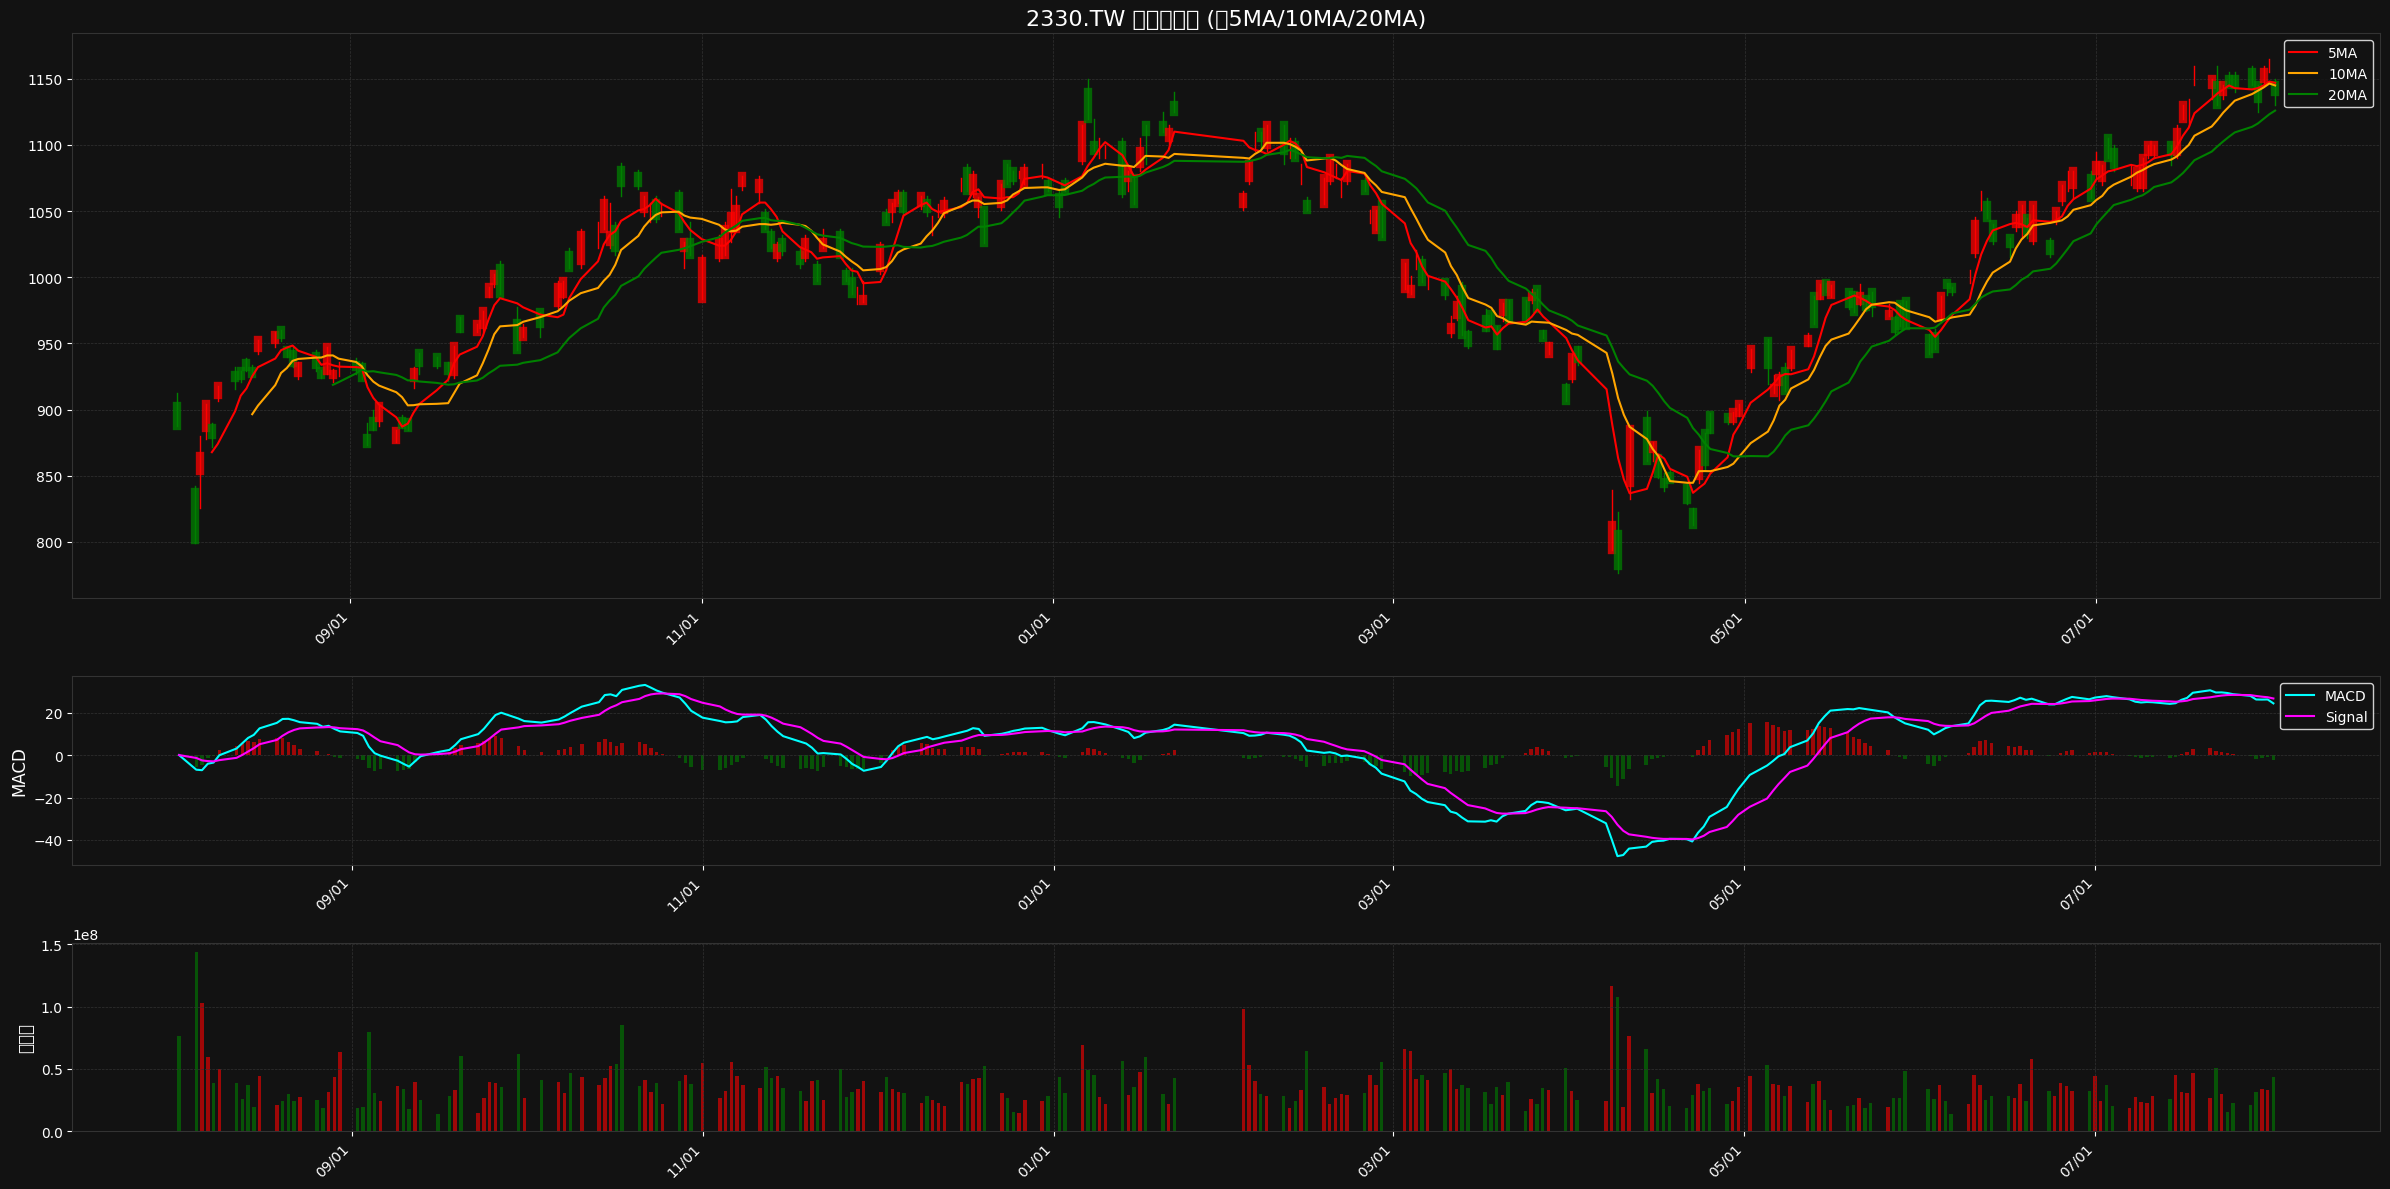

/tmp/ipython-input-3757541977.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
/tmp/ipython-input-3757541977.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.plot([dates[i], dates[i]], [df['Low'][i], df['High'][i]],
/tmp/ipython-input-3757541977.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [min(df['Open'][i], df['Close'][i]), max(df['Open'][i], df['Close'

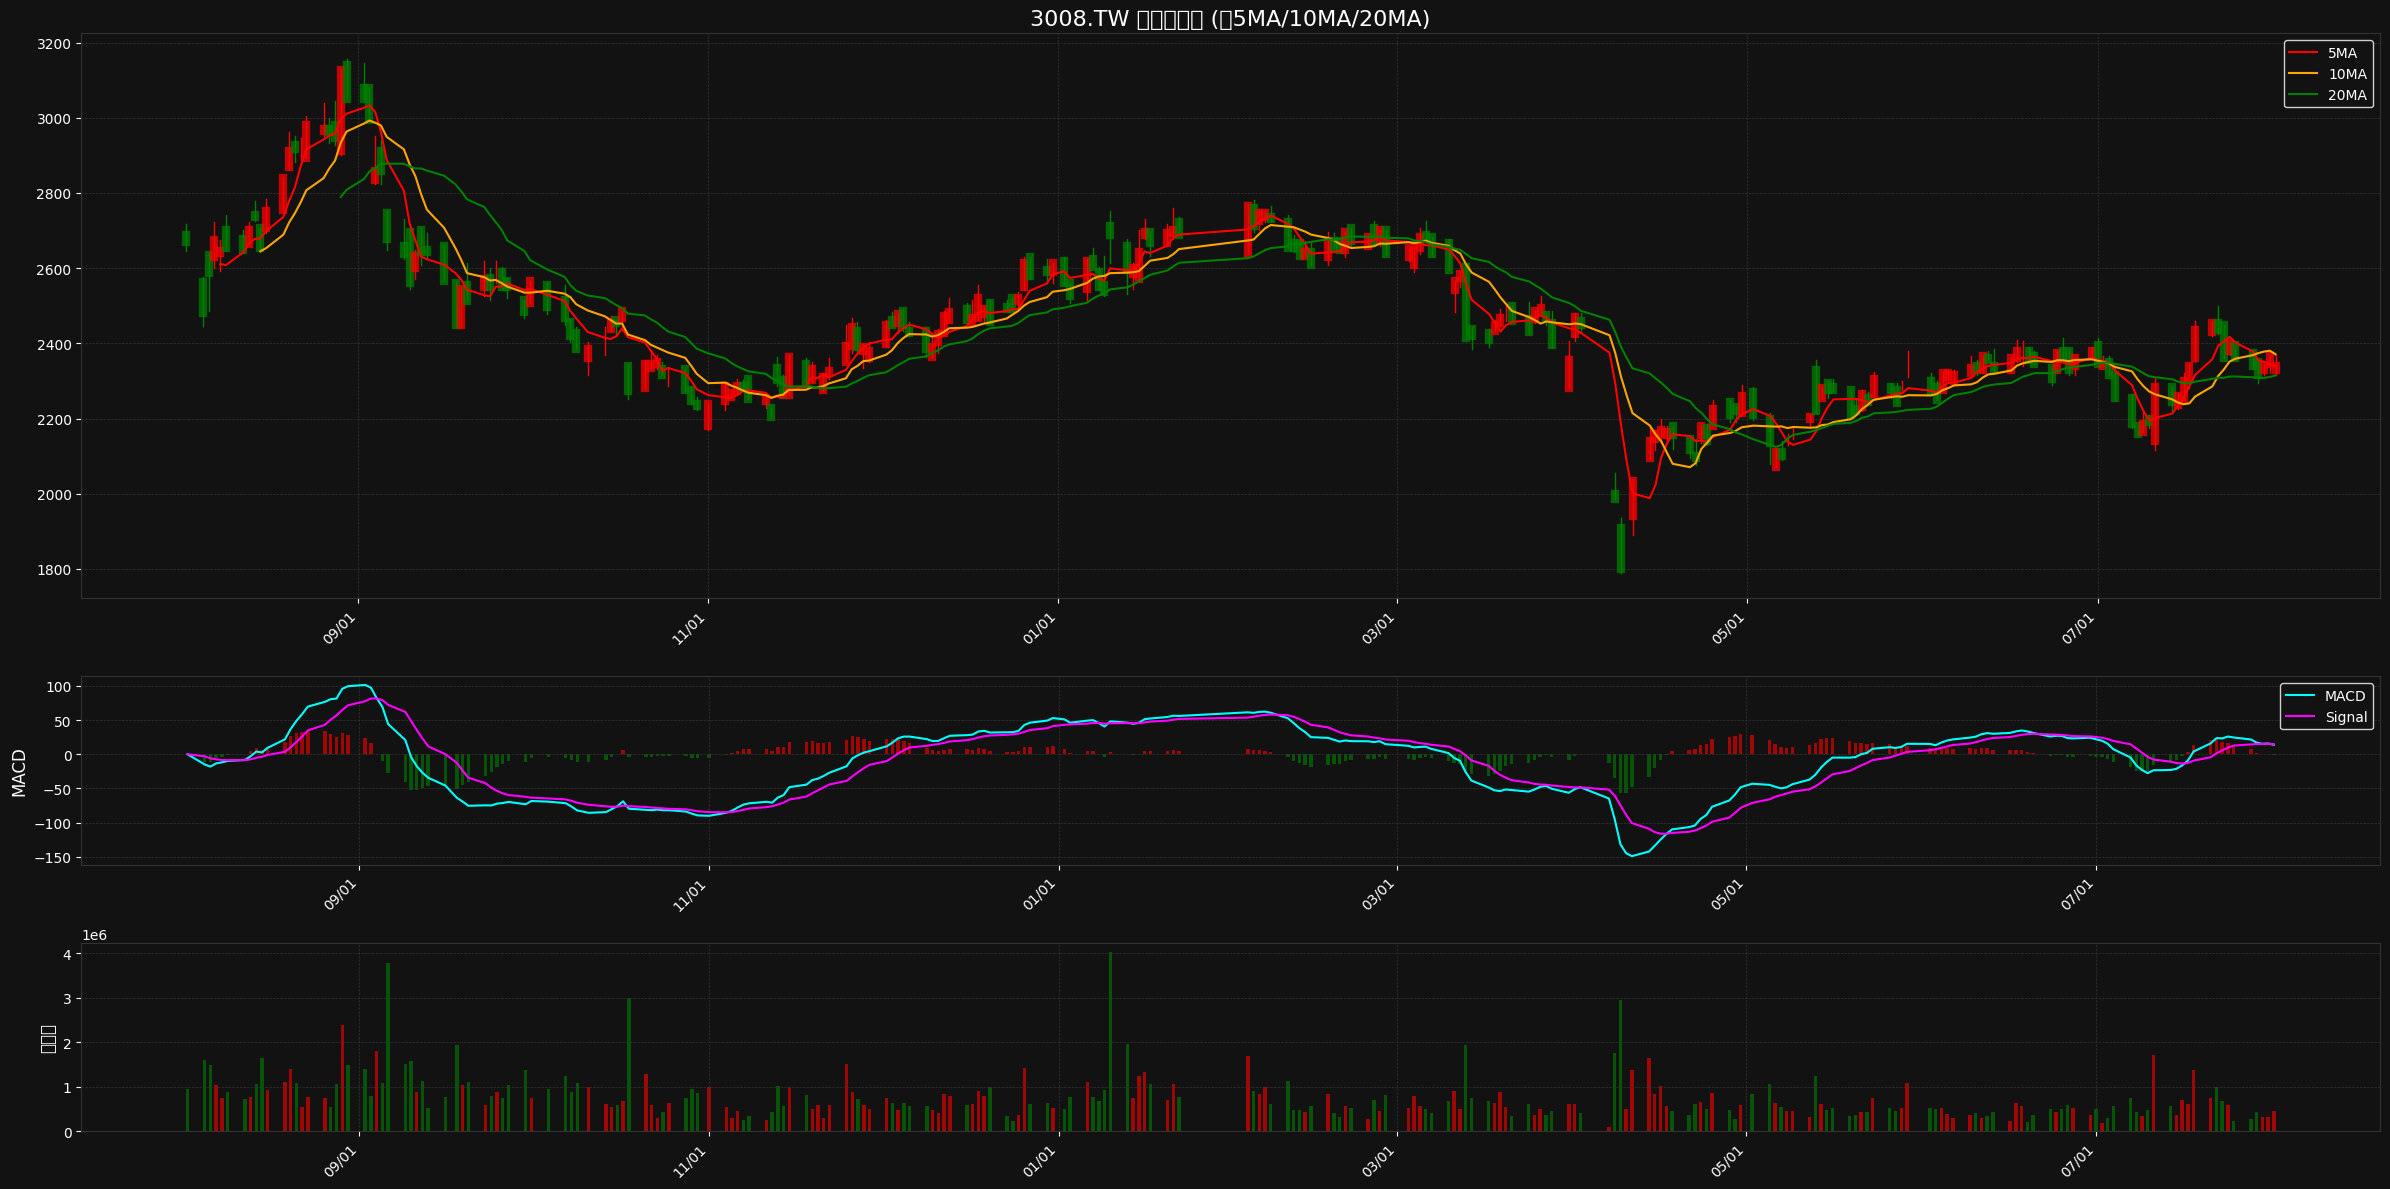

/tmp/ipython-input-3757541977.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
/tmp/ipython-input-3757541977.py:121: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.plot([dates[i], dates[i]], [df['Low'][i], df['High'][i]],
/tmp/ipython-input-3757541977.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [min(df['Open'][i], df['Close'][i]), max(df['Open'][i], df['Close'

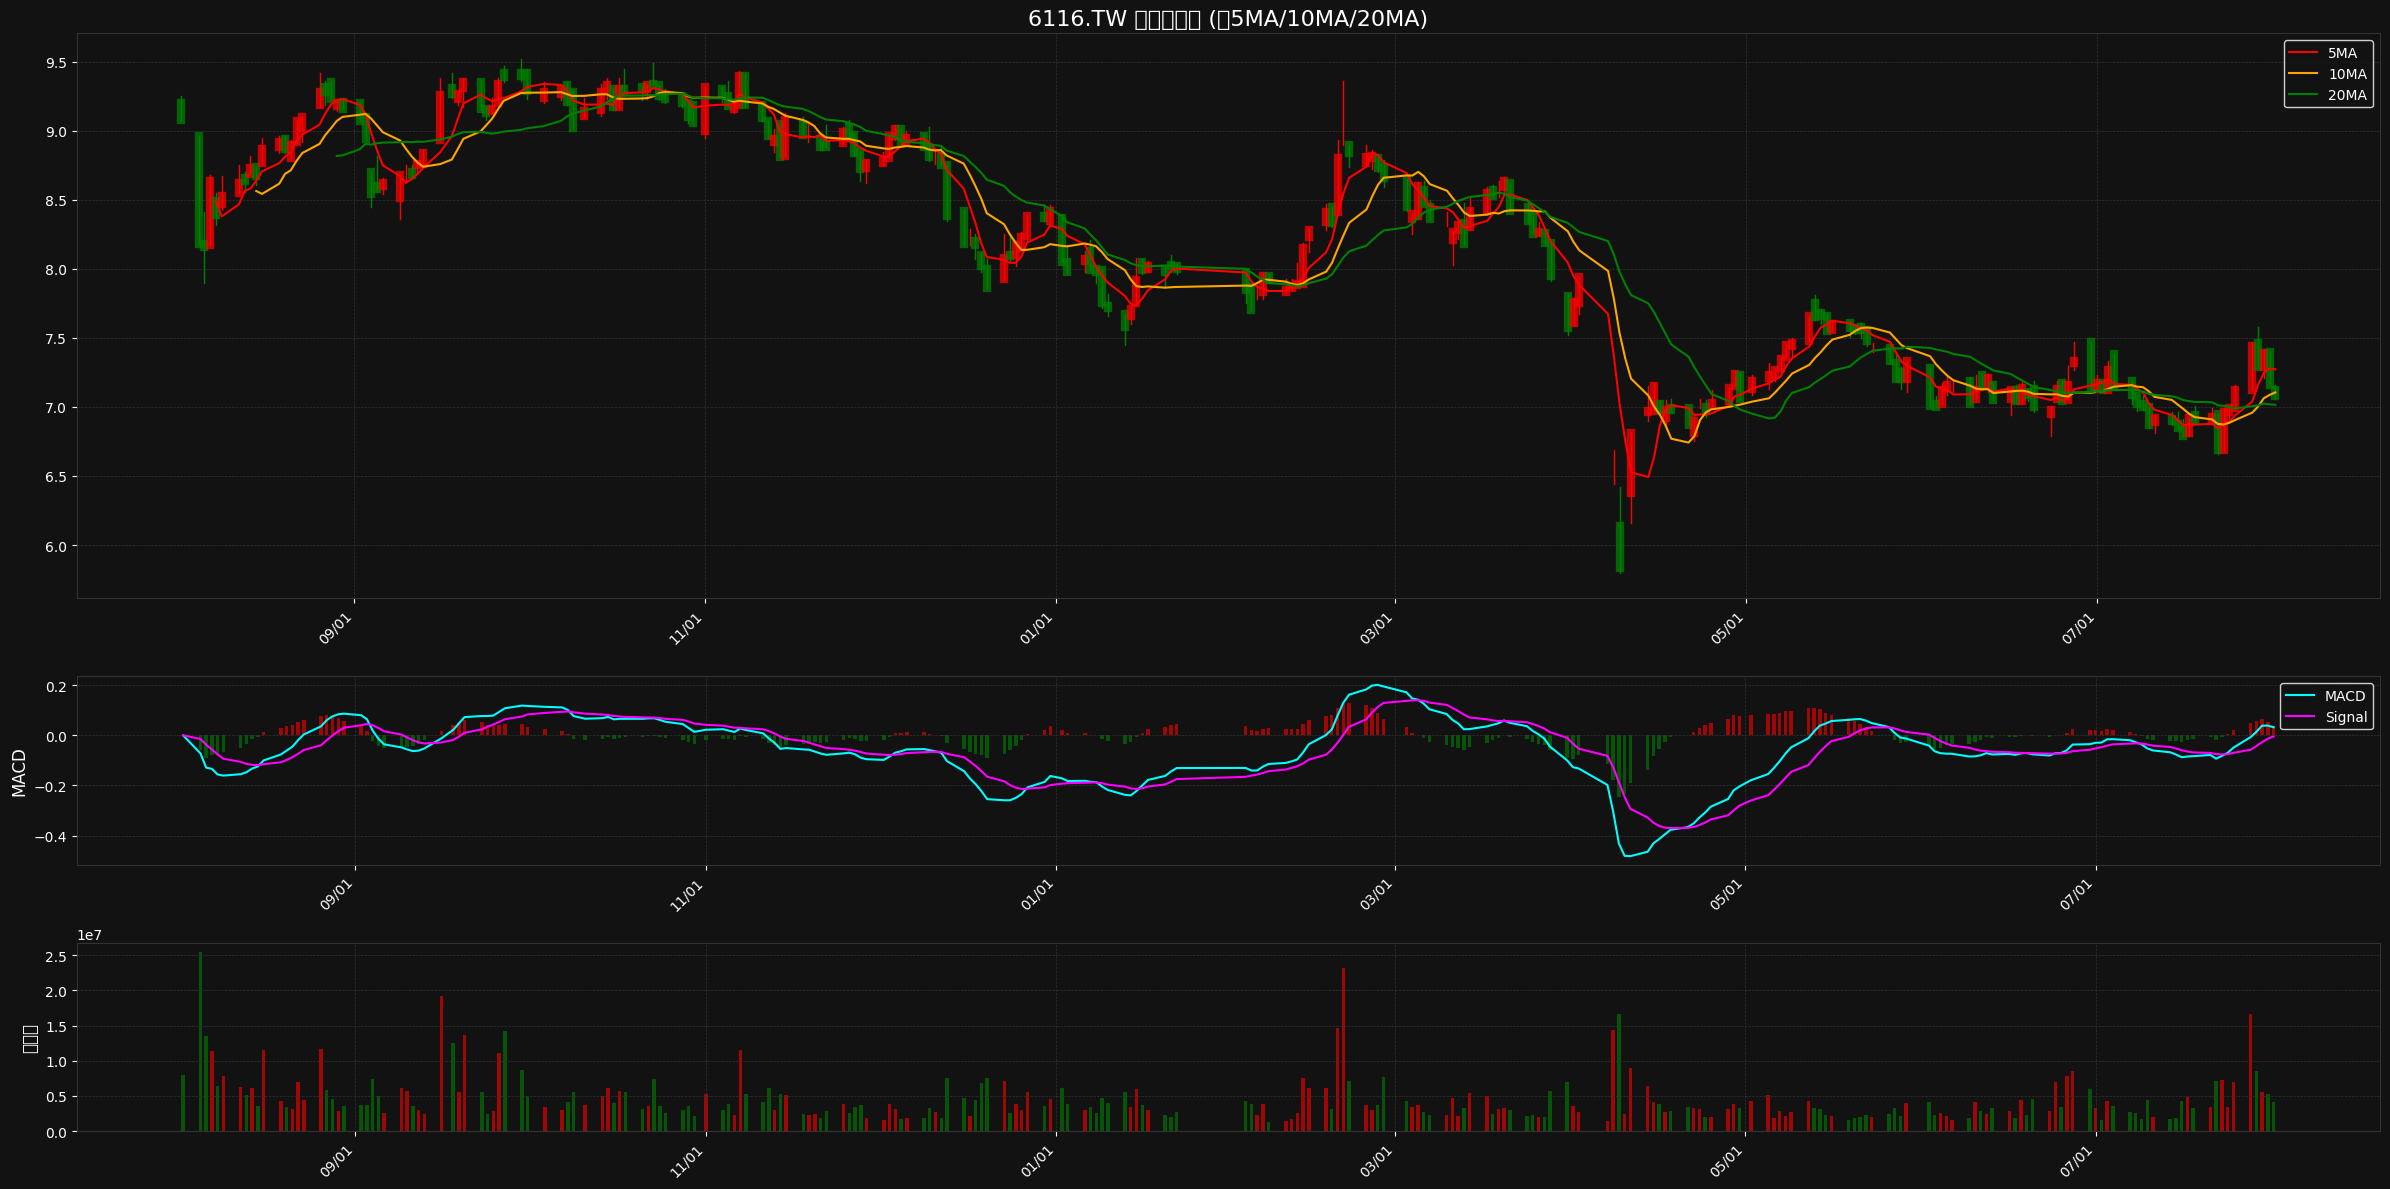


是否儲存圖表? (y/n, 30秒後自動取消): 
輸入超時，自動取消儲存
圖表未儲存


In [ ]:
## 4 ok
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import threading
from matplotlib import gridspec
from queue import Queue

# 暗色模式配色
DARK_BG = '#121212'
GRID_COLOR = '#333333'
TEXT_COLOR = 'white'
MA5_COLOR = 'red'    # 5MA線顏色（紅色）
MA10_COLOR = 'orange' # 10MA線顏色（橙色）
MA20_COLOR = 'green'  # 20MA線顏色（綠色）

def get_stock_data(stock_symbols, start_date):
    # 處理多個股票代號
    symbols_list = [s.strip().upper() for s in stock_symbols.split(',')]
    processed_symbols = []
    valid_symbols = []

    for symbol in symbols_list:
        # 檢查股票代號是否已有後綴
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            # 先嘗試上市股票
            processed_symbols.append(symbol + '.TW')
        else:
            processed_symbols.append(symbol)

    try:
        df = yf.download(processed_symbols, start=start_date, group_by='ticker')

        # 檢查哪些股票成功取得資料
        for symbol in processed_symbols:
            if symbol in df.columns.get_level_values(0):
                valid_symbols.append(symbol)

        if not valid_symbols:
            print("所有股票代號均無法取得資料，請確認代號是否正確")
            return None

        print(f"成功取得 {', '.join(valid_symbols)} 的股票資料")

        # 找出失敗的代號
        failed_symbols = [s for s in processed_symbols if s not in valid_symbols]
        if failed_symbols:
            print(f"以下代號無法取得資料: {', '.join(failed_symbols)} (可能已下市或代號錯誤)")

        return df
    except Exception as e:
        print(f"取得股票資料時發生錯誤: {e}")
        return None

def get_valid_date(prompt, default_date):
    while True:
        date_input = input(prompt).strip()
        if not date_input:
            return default_date
        try:
            return datetime.datetime.strptime(date_input, "%Y-%m-%d")
        except ValueError:
            print("日期格式不正確，請使用 YYYY-MM-DD 格式")

def calculate_technical_indicators(df):
    """計算所有技術指標"""
    # 計算MACD
    df['EMA_Fast'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_Slow'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_Fast'] - df['EMA_Slow']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['Histogram'] = df['MACD'] - df['Signal']

    # 計算移動平均線
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()

    return df

def input_with_timeout(prompt, timeout=30):
    """帶超時的輸入函數（30秒）"""
    print(prompt, end='', flush=True)
    q = Queue()

    def input_thread():
        q.put(input())

    thread = threading.Thread(target=input_thread)
    thread.daemon = True
    thread.start()

    try:
        return q.get(timeout=timeout)
    except:
        print("\n輸入超時，自動取消儲存")
        return 'n'

def plot_stock_with_indicators(stock_data, symbol):
    try:
        # 準備K線圖資料並計算指標
        df = stock_data[symbol].copy()
        df = calculate_technical_indicators(df)

        # 創建暗色背景圖表
        plt.style.use('dark_background')
        fig = plt.figure(figsize=(24, 12), facecolor=DARK_BG)
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1])

        # 1. K線圖區域
        ax1 = plt.subplot(gs[0])
        ax1.set_facecolor(DARK_BG)

        # 繪製K線圖
        dates = mdates.date2num(df.index.to_pydatetime())
        for i in range(len(df)):
            color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
            ax1.plot([dates[i], dates[i]], [df['Low'][i], df['High'][i]],
                    color=color, linewidth=1)
            ax1.plot([dates[i], dates[i]],
                    [min(df['Open'][i], df['Close'][i]), max(df['Open'][i], df['Close'][i])],
                    color=color, linewidth=6, alpha=0.75)

        # 繪製移動平均線
        ax1.plot(dates, df['MA5'], color=MA5_COLOR, label='5MA', linewidth=1.5)
        ax1.plot(dates, df['MA10'], color=MA10_COLOR, label='10MA', linewidth=1.5)
        ax1.plot(dates, df['MA20'], color=MA20_COLOR, label='20MA', linewidth=1.5)

        # 2. MACD指標區域
        ax2 = plt.subplot(gs[1])
        ax2.set_facecolor(DARK_BG)

        # 繪製MACD指標
        ax2.plot(dates, df['MACD'], color='cyan', label='MACD', linewidth=1.5)
        ax2.plot(dates, df['Signal'], color='magenta', label='Signal', linewidth=1.5)
        for i in range(len(df)):
            color = 'r' if df['Histogram'][i] >= 0 else 'g'
            ax2.bar(dates[i], df['Histogram'][i], width=0.6, color=color, alpha=0.6)

        # 3. 成交量區域
        ax3 = plt.subplot(gs[2])
        ax3.set_facecolor(DARK_BG)

        # 繪製成交量
        for i in range(len(df)):
            color = 'r' if df['Close'][i] >= df['Open'][i] else 'g'
            ax3.bar(dates[i], df['Volume'][i], width=0.6, color=color, alpha=0.6)

        # 設置圖表格式
        for ax in [ax1, ax2, ax3]:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax.grid(True, linestyle='--', linewidth=0.5, color=GRID_COLOR)
            ax.tick_params(colors=TEXT_COLOR)
            for spine in ax.spines.values():
                spine.set_color(GRID_COLOR)
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        ax1.set_title(f'{symbol} 技術分析圖 (含5MA/10MA/20MA)', fontsize=16, color=TEXT_COLOR)
        ax1.legend(facecolor=DARK_BG, edgecolor=TEXT_COLOR)
        ax2.set_ylabel('MACD', fontsize=12, color=TEXT_COLOR)
        ax2.legend(facecolor=DARK_BG, edgecolor=TEXT_COLOR)
        ax3.set_ylabel('成交量', fontsize=12, color=TEXT_COLOR)

        plt.tight_layout()
        plt.show()

        return fig

    except Exception as e:
        print(f"繪製K線圖時發生錯誤: {e}")
        return None

def save_figures_to_png(figures, symbols):
    """儲存圖表為PNG檔案"""
    if not os.path.exists('stock_charts'):
        os.makedirs('stock_charts')

    saved_files = []
    for fig, symbol in zip(figures, symbols):
        if fig:
            filename = f"stock_charts/{symbol}_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
            fig.savefig(filename, dpi=300, bbox_inches='tight', facecolor=DARK_BG)
            saved_files.append(filename)
            plt.close(fig)

    if saved_files:
        print("\n圖表已儲存:")
        for file in saved_files:
            print(f"- {file}")

# 主程式
print("台灣股票技術分析圖 (含5MA/10MA/20MA)")
print("請輸入股票代號 (多個請用逗號分隔，如: 2330.TW,2454.TWO)")

today = datetime.datetime.now()
default_start = today - datetime.timedelta(days=365*1)

start_date = get_valid_date(
    f"請輸入開始日期 (YYYY-MM-DD，預設 {default_start.date()}): ",
    default_start
)

while True:
    user_input = input("\n請輸入股票代號 (或輸入 'quit' 結束): ").strip()

    if user_input.lower() == 'quit':
        break

    if not user_input:
        print("請輸入有效的股票代號")
        continue

    stock_data = get_stock_data(user_input, start_date)
    if stock_data is None:
        continue

    print("\n前5筆資料:")
    print(stock_data.head())
    print("\n最近5筆資料:")
    print(stock_data.tail())

    symbols = [s.strip().upper() for s in user_input.split(',')]
    processed_symbols = []
    figures = []

    for symbol in symbols:
        if not (symbol.endswith('.TW') or symbol.endswith('.TWO')):
            symbol += '.TW'
        processed_symbols.append(symbol)

        if symbol in stock_data.columns.get_level_values(0):
            fig = plot_stock_with_indicators(stock_data, symbol)
            figures.append(fig)
        else:
            figures.append(None)
            print(f"警告: {symbol} 無有效資料")

    # 30秒內未回應自動取消儲存
    save_choice = input_with_timeout("\n是否儲存圖表? (y/n, 30秒後自動取消): ", 30)
    if save_choice.lower() == 'y':
        save_figures_to_png(figures, processed_symbols)
    else:
        for fig in figures:
            if fig: plt.close(fig)
        print("圖表未儲存")

print("程式結束")